In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from dpp.data import load_from_kaggle


/Users/ebbykuriakose/Desktop/Project/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset_link = "gagandeep16/car-sales" # replace with your dataset link from Kaggle 
destination = "../data/raw"
dataset_name = dataset_link.split("/")[-1]

files = load_from_kaggle(
    dataset_link=dataset_link, 
    destination=destination,
    )

Destination directory '../data/raw/car-sales' already exists with files. Skipping download (replace=False).


In [3]:
files

['Car_sales.csv']

In [4]:
# Load Dataset
df = pd.read_csv("/".join(["../data/raw/", dataset_name, files[0]]))
df.head()

Manufacturer    Model  Sales_in_thousands  __year_resale_value Vehicle_type  \
0        Acura  Integra              16.919               16.360    Passenger   
1        Acura       TL              39.384               19.875    Passenger   
2        Acura       CL              14.114               18.225    Passenger   
3        Acura       RL               8.588               29.725    Passenger   
4         Audi       A4              20.397               22.255    Passenger   

   Price_in_thousands  Engine_size  Horsepower  Wheelbase  Width  Length  \
0               21.50          1.8       140.0      101.2   67.3   172.4   
1               28.40          3.2       225.0      108.1   70.3   192.9   
2                 NaN          3.2       225.0      106.9   70.6   192.0   
3               42.00          3.5       210.0      114.6   71.4   196.6   
4               23.99          1.8       150.0      102.6   68.2   178.0   

   Curb_weight  Fuel_capacity  Fuel_efficiency Latest_Launch  \
0        2.639           13.2             28.0      2/2/2012   
1        3.517           17.2             25.0      6/3/2011   
2        3.470           17.2             26.0      1/4/2012   
3        3.850           18.0             22.0     3/10/2011   
4        2.998           16.4             27.0     10/8/2011   

   Power_perf_factor  
0          58.280150  
1          91.370778  
2                NaN  
3          91.389779  
4          62.777639

In [5]:
# Inspect Dataset
display(
    "Shape",
    df.shape,
    "Description",
    df.describe().round(2),
    "Duplicates",
    df.duplicated().sum(),
)


pd.DataFrame(
    {
        "Data Types": df.dtypes,
        "Missing Values": df.isnull().sum(),
        "Unique Values": df.nunique(),
        "Sample Values": [df[col].sample(3).tolist() for col in df.columns]
    })


'Shape'

(157, 16)

'Description'

Sales_in_thousands  __year_resale_value  Price_in_thousands  \
count              157.00               121.00              155.00   
mean                53.00                18.07               27.39   
std                 68.03                11.45               14.35   
min                  0.11                 5.16                9.24   
25%                 14.11                11.26               18.02   
50%                 29.45                14.18               22.80   
75%                 67.96                19.88               31.95   
max                540.56                67.55               85.50   

       Engine_size  Horsepower  Wheelbase   Width  Length  Curb_weight  \
count       156.00      156.00     156.00  156.00  156.00       155.00   
mean          3.06      185.95     107.49   71.15  187.34         3.38   
std           1.04       56.70       7.64    3.45   13.43         0.63   
min           1.00       55.00      92.60   62.60  149.40         1.90   
25%           2.30      149.50     103.00   68.40  177.58         2.97   
50%           3.00      177.50     107.00   70.55  187.90         3.34   
75%           3.58      215.00     112.20   73.43  196.12         3.80   
max           8.00      450.00     138.70   79.90  224.50         5.57   

       Fuel_capacity  Fuel_efficiency  Power_perf_factor  
count         156.00           154.00             155.00  
mean           17.95            23.84              77.04  
std             3.89             4.28              25.14  
min            10.30            15.00              23.28  
25%            15.80            21.00              60.41  
50%            17.20            24.00              72.03  
75%            19.58            26.00              89.41  
max            32.00            45.00             188.14

'Duplicates'

np.int64(0)

Data Types  Missing Values  Unique Values  \
Manufacturer            object               0             30   
Model                   object               0            156   
Sales_in_thousands     float64               0            157   
__year_resale_value    float64              36            117   
Vehicle_type            object               0              2   
Price_in_thousands     float64               2            152   
Engine_size            float64               1             31   
Horsepower             float64               1             66   
Wheelbase              float64               1             88   
Width                  float64               1             78   
Length                 float64               1            127   
Curb_weight            float64               2            147   
Fuel_capacity          float64               1             55   
Fuel_efficiency        float64               3             20   
Latest_Launch           object               0            130   
Power_perf_factor      float64               2            154   

                                               Sample Values  
Manufacturer                         [Subaru, Toyota, Honda]  
Model                        [Sebring Coupe, Civic, Voyager]  
Sales_in_thousands                    [5.223, 3.334, 24.629]  
__year_resale_value                   [18.81, 15.24, 12.025]  
Vehicle_type               [Passenger, Passenger, Passenger]  
Price_in_thousands                     [19.99, 17.518, 43.0]  
Engine_size                                  [1.9, 1.5, 3.8]  
Horsepower                             [230.0, 200.0, 225.0]  
Wheelbase                              [103.7, 102.4, 100.8]  
Width                                     [68.3, 69.3, 74.5]  
Length                                 [172.3, 190.2, 157.3]  
Curb_weight                            [3.944, 3.379, 2.998]  
Fuel_capacity                             [19.0, 16.3, 25.0]  
Fuel_efficiency                           [29.0, 19.0, 19.0]  
Latest_Launch             [11/14/2011, 7/23/2011, 9/10/2012]  
Power_perf_factor    [62.44196235, 87.21100104, 56.29524304]

In [6]:
df.info()
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

Sales_in_thousands  __year_resale_value  Price_in_thousands  \
count          157.000000           121.000000          155.000000   
mean            52.998076            18.072975           27.390755   
std             68.029422            11.453384           14.351653   
min              0.110000             5.160000            9.235000   
25%             14.114000            11.260000           18.017500   
50%             29.450000            14.180000           22.799000   
75%             67.956000            19.875000           31.947500   
max            540.561000            67.550000           85.500000   

       Engine_size  Horsepower   Wheelbase       Width      Length  \
count   156.000000  156.000000  156.000000  156.000000  156.000000   
mean      3.060897  185.948718  107.487179   71.150000  187.343590   
std       1.044653   56.700321    7.641303    3.451872   13.431754   
min       1.000000   55.000000   92.600000   62.600000  149.400000   
25%       2.300000  149.500000  103.000000   68.400000  177.575000   
50%       3.000000  177.500000  107.000000   70.550000  187.900000   
75%       3.575000  215.000000  112.200000   73.425000  196.125000   
max       8.000000  450.000000  138.700000   79.900000  224.500000   

       Curb_weight  Fuel_capacity  Fuel_efficiency  Power_perf_factor  
count   155.000000     156.000000       154.000000         155.000000  
mean      3.378026      17.951923        23.844156          77.043591  
std       0.630502       3.887921         4.282706          25.142664  
min       1.895000      10.300000        15.000000          23.276272  
25%       2.971000      15.800000        21.000000          60.407707  
50%       3.342000      17.200000        24.000000          72.030917  
75%       3.799500      19.575000        26.000000          89.414878  
max       5.572000      32.000000        45.000000         188.144323

In [7]:
# Remaning Column
# Renaming __year_resale_value column
if "__year_resale_value" in df.columns:
    df.rename(columns={"__year_resale_value": "Year_resale_value"}, inplace=True)

In [8]:
# Modifying data types of respective object columns to categorical columns and datetime

category_col = ["Manufacturer","Model","Vehicle_type"]
for col in category_col:
    df[col] = df[col].astype("category")

df["Latest_Launch"] = pd.to_datetime(df["Latest_Launch"], errors = "coerce")

In [9]:
# Drop Model column
#df.drop(['Model'], axis = 1, inplace = True)
#df

In [10]:
# Handling missing values in year_resale_value column
df["Year_resale_value"] = df["Year_resale_value"].fillna(df["Year_resale_value"].median())

In [11]:
# Drop Chrysler Town & Country row
df = df.drop(index = 33)

# Fill Acura CL missing values with median
df["Price_in_thousands"] = df["Price_in_thousands"].fillna(df["Price_in_thousands"].median())
df["Power_perf_factor"] = df["Power_perf_factor"].fillna(df["Power_perf_factor"].median())


In [12]:
# Linear Regression model to replace missing Curb_weight value

# Choose predictors for Curb_weight
features = ["Length", "Width", "Engine_size", "Horsepower", "Wheelbase", "Fuel_capacity"]

# Split data into rows with and without Curb_weight
train_data = df[df["Curb_weight"].notnull()]
test_data = df[df["Curb_weight"].isnull()]

# Save indices of missing rows
missing_idx = test_data.index

# Prepare training data
X_train = train_data[features]
y_train = train_data["Curb_weight"]

# Train regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict missing Curb_weight
X_test = test_data[features]
predicted_values = model.predict(X_test)

# Assign predictions back
df.loc[missing_idx, "Curb_weight"] = predicted_values

# Print imputed rows horizontally
print("Rows imputed using regression:")
display(df.loc[missing_idx])


Rows imputed using regression:


Manufacturer    Model  Sales_in_thousands  Year_resale_value Vehicle_type  \
15     Cadillac  Seville              15.943               27.1    Passenger   

    Price_in_thousands  Engine_size  Horsepower  Wheelbase  Width  Length  \
15              44.475          4.6       275.0      112.2   75.0   201.0   

    Curb_weight  Fuel_capacity  Fuel_efficiency Latest_Launch  \
15     3.816319           18.5             22.0    2011-04-29   

    Power_perf_factor  
15         115.621358

In [13]:
# Linear Regression model to replace missing Fuel_efficency value

# Choose predictors for Fuel_efficiency
features = ["Engine_size", "Horsepower", "Curb_weight"]

# Split data into rows with and without Fuel_efficiency
train_data = df[df["Fuel_efficiency"].notnull()]
test_data  = df[df["Fuel_efficiency"].isnull()]

# Save indices of missing rows
missing_idx = test_data.index

# Prepare training data
X_train = train_data[features]
y_train = train_data["Fuel_efficiency"]

# Train regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict missing Fuel_efficiency values
X_test = test_data[features]
predicted_values = model.predict(X_test)

# Assign predictions back
df.loc[missing_idx, "Fuel_efficiency"] = predicted_values

# Print imputed rows horizontally
print("Rows imputed using regression:")
display(df.loc[missing_idx])

Rows imputed using regression:


Manufacturer     Model  Sales_in_thousands  Year_resale_value  \
38         Dodge  Intrepid              88.028             12.275   
109   Oldsmobile  Intrigue              38.554             14.180   

    Vehicle_type  Price_in_thousands  Engine_size  Horsepower  Wheelbase  \
38     Passenger              22.505          2.7       202.0      113.0   
109    Passenger              24.150          3.5       215.0      109.0   

     Width  Length  Curb_weight  Fuel_capacity  Fuel_efficiency Latest_Launch  \
38    74.7   203.7        3.489           17.0        23.674701    2012-06-02   
109   73.6   195.9        3.455           18.0        23.028418    2011-04-01   

     Power_perf_factor  
38           80.831470  
109          86.272523

In [14]:
display(df.describe().round(2))
df.info()

Sales_in_thousands  Year_resale_value  Price_in_thousands  Engine_size  \
count              156.00             156.00              156.00       156.00   
mean                52.99              17.17               27.36         3.06   
min                  0.11               5.16                9.24         1.00   
25%                 14.04              12.53               18.08         2.30   
50%                 29.21              14.18               22.80         3.00   
75%                 68.07              17.89               31.94         3.58   
max                540.56              67.55               85.50         8.00   
std                 68.25              10.21               14.31         1.04   

       Horsepower  Wheelbase   Width  Length  Curb_weight  Fuel_capacity  \
count      156.00     156.00  156.00  156.00       156.00         156.00   
mean       185.95     107.49   71.15  187.34         3.38          17.95   
min         55.00      92.60   62.60  149.40         1.90          10.30   
25%        149.50     103.00   68.40  177.58         2.97          15.80   
50%        177.50     107.00   70.55  187.90         3.36          17.20   
75%        215.00     112.20   73.43  196.12         3.82          19.58   
max        450.00     138.70   79.90  224.50         5.57          32.00   
std         56.70       7.64    3.45   13.43         0.63           3.89   

       Fuel_efficiency                  Latest_Launch  Power_perf_factor  
count           156.00                            156             156.00  
mean             23.84  2011-12-04 16:36:55.384615424              77.01  
min              15.00            2008-02-13 00:00:00              23.28  
25%              21.00            2011-07-04 18:00:00              60.57  
50%              24.00            2011-12-11 00:00:00              72.03  
75%              26.00            2012-06-02 12:00:00              89.41  
max              45.00            2012-12-29 00:00:00             188.14  
std               4.26                            NaN              25.06

<class 'pandas.core.frame.DataFrame'>
Index: 156 entries, 0 to 156
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Manufacturer        156 non-null    category      
 1   Model               156 non-null    category      
 2   Sales_in_thousands  156 non-null    float64       
 3   Year_resale_value   156 non-null    float64       
 4   Vehicle_type        156 non-null    category      
 5   Price_in_thousands  156 non-null    float64       
 6   Engine_size         156 non-null    float64       
 7   Horsepower          156 non-null    float64       
 8   Wheelbase           156 non-null    float64       
 9   Width               156 non-null    float64       
 10  Length              156 non-null    float64       
 11  Curb_weight         156 non-null    float64       
 12  Fuel_capacity       156 non-null    float64       
 13  Fuel_efficiency     156 non-null    float64       
 14 


Column: Sales_in_thousands
Skewness: 3.40
Highly right-skewed


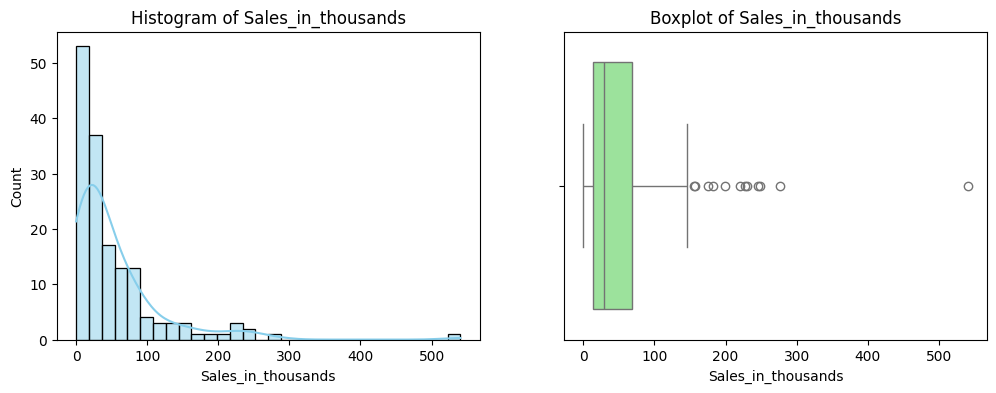


Column: Year_resale_value
Skewness: 2.76
Highly right-skewed


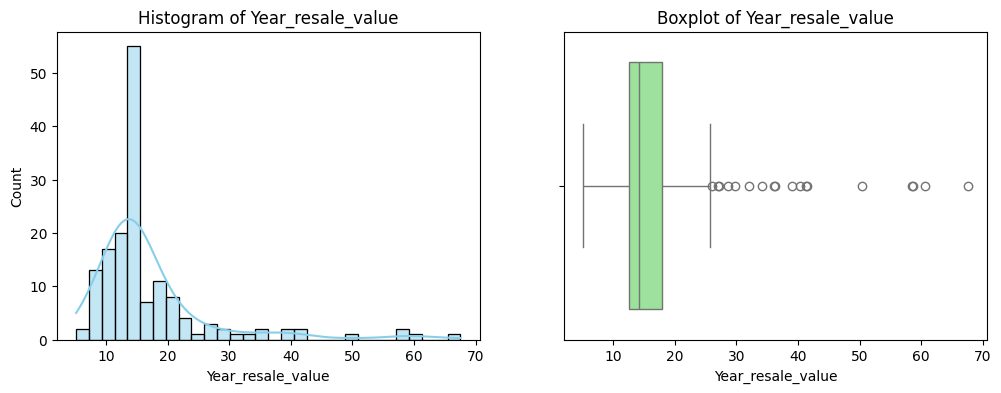


Column: Price_in_thousands
Skewness: 1.78
Highly right-skewed


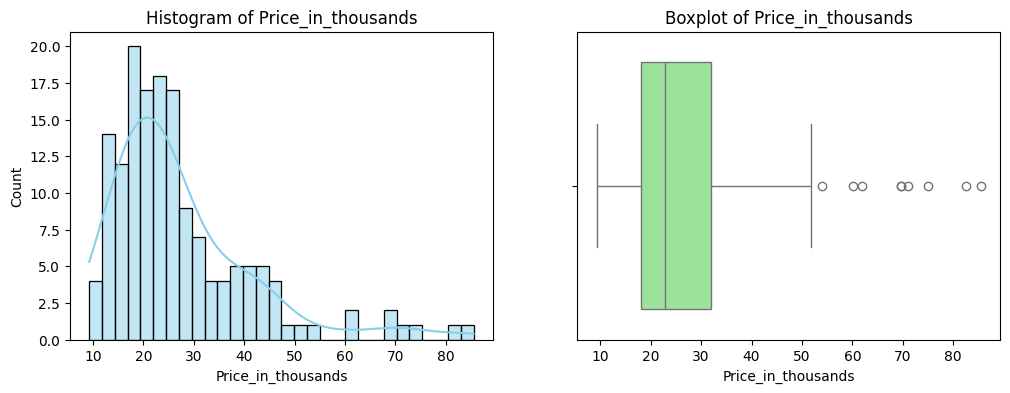


Column: Engine_size
Skewness: 1.10
Highly right-skewed


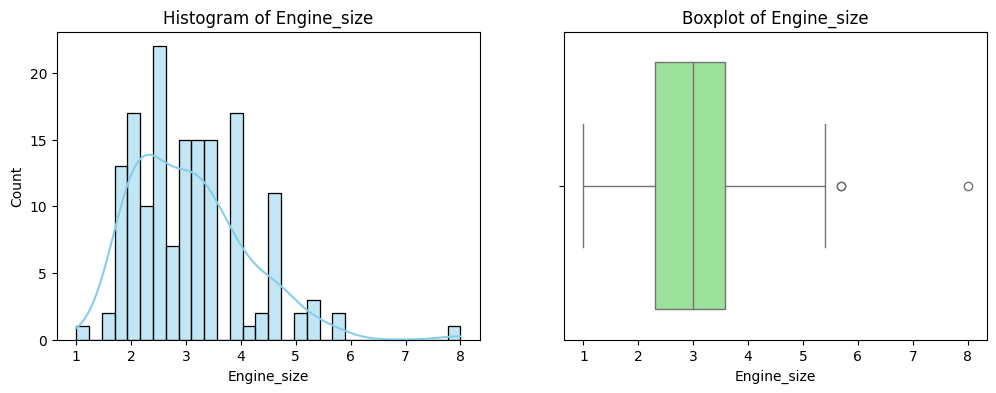


Column: Horsepower
Skewness: 1.00
Highly right-skewed


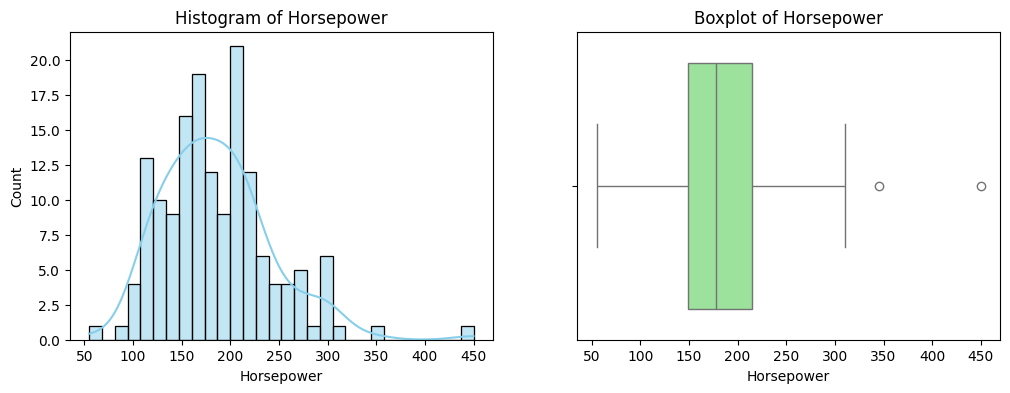


Column: Wheelbase
Skewness: 0.97
Moderately right-skewed


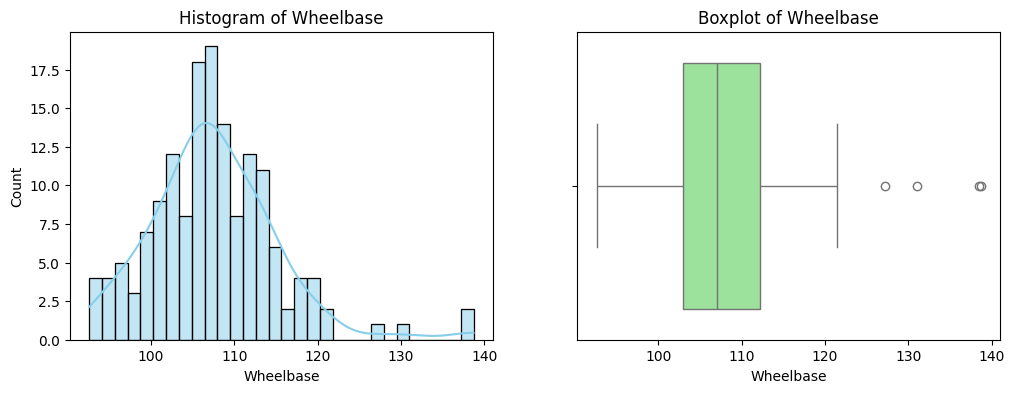


Column: Width
Skewness: 0.48
Approximately symmetric


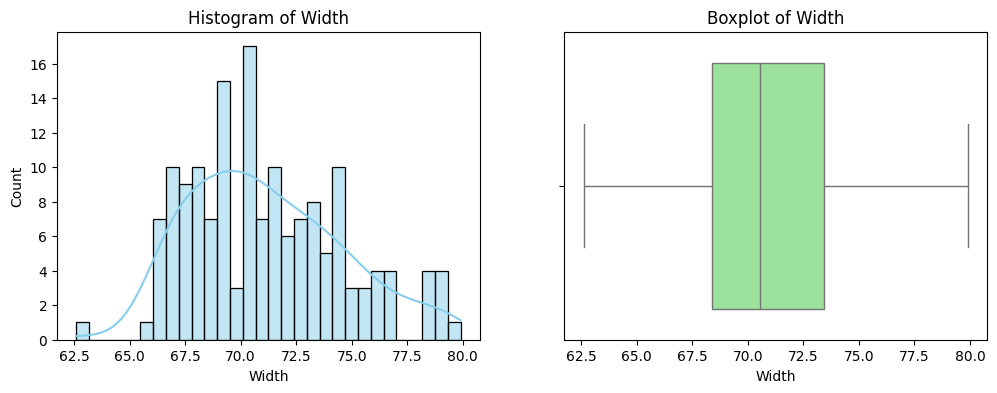


Column: Length
Skewness: -0.06
Approximately symmetric


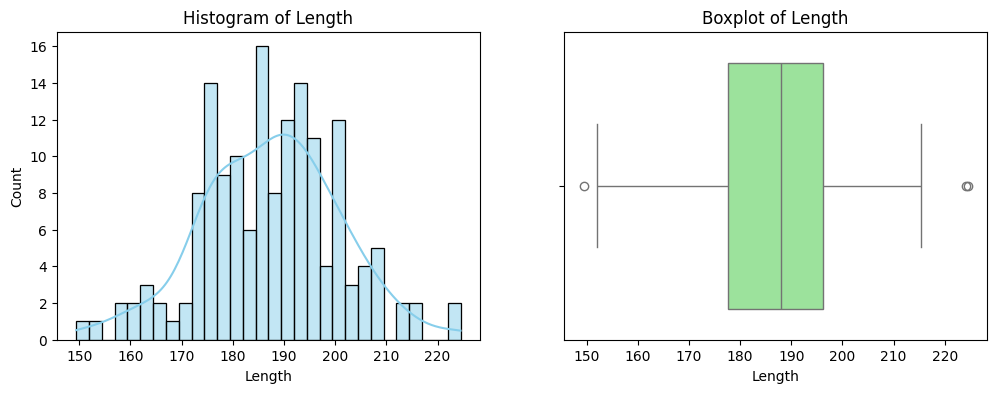


Column: Curb_weight
Skewness: 0.70
Moderately right-skewed


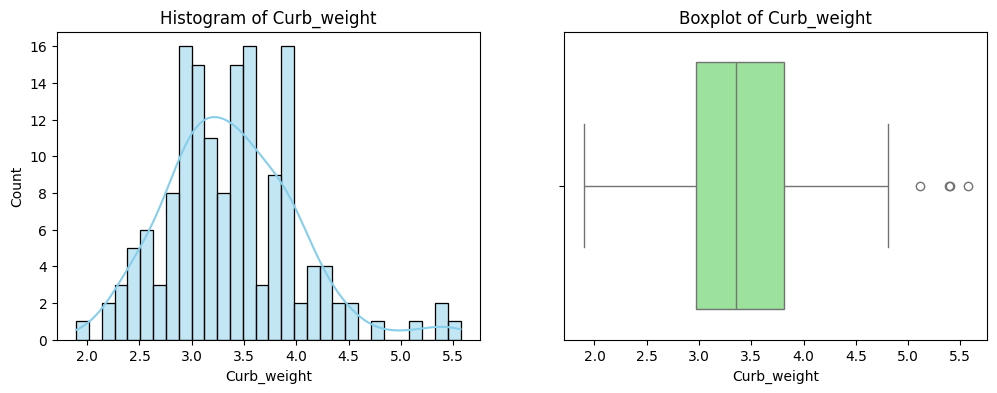


Column: Fuel_capacity
Skewness: 1.14
Highly right-skewed


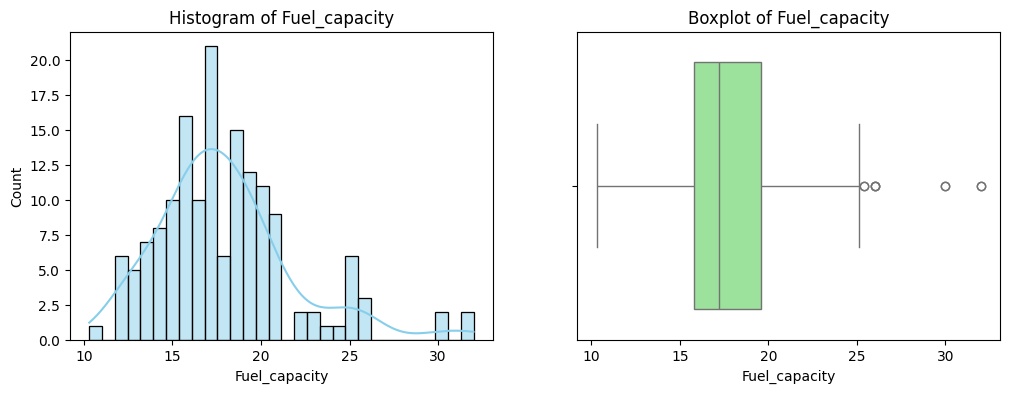


Column: Fuel_efficiency
Skewness: 0.70
Moderately right-skewed


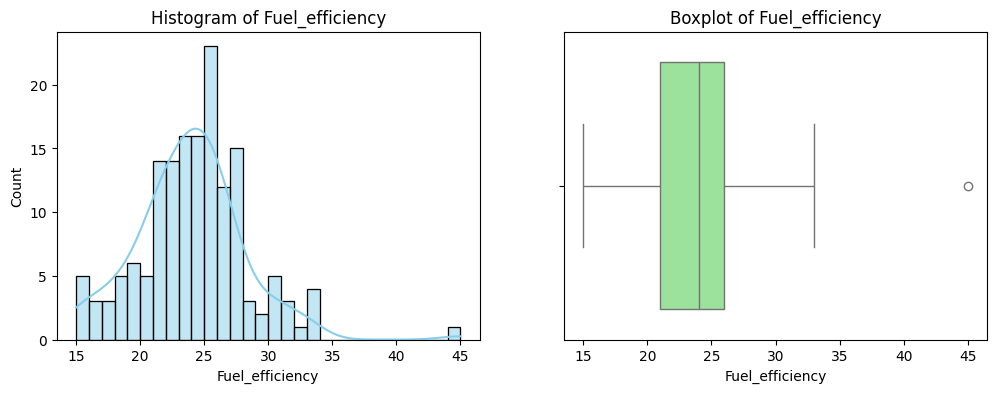


Column: Power_perf_factor
Skewness: 1.08
Highly right-skewed


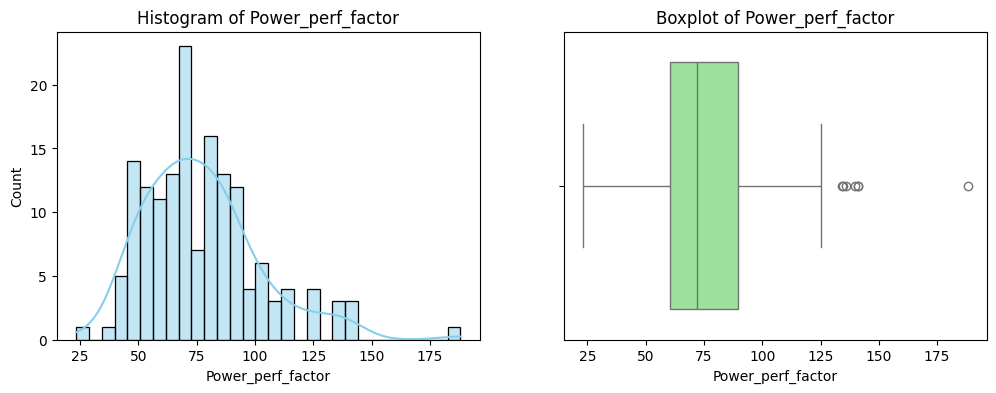

In [15]:
# Univariate Analysis
# Numeric Columns Analysis
numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols:
    skewness = df[col].skew()

    print(f"\nColumn: {col}")
    print(f"Skewness: {skewness:.2f}")
    
    if skewness > 1:
        print("Highly right-skewed")
    elif skewness > 0.5:
        print("Moderately right-skewed")
    elif skewness < -1:
        print("Highly left-skewed")
    elif skewness < -0.5:
        print("Moderately left-skewed")
    else:
        print("Approximately symmetric")
    
    plt.figure(figsize=(12,4))
    
    # Histogram with KDE
    plt.subplot(1,2,1)
    sns.histplot(df[col], bins=30, kde=True, color='skyblue')
    plt.title(f"Histogram of {col}")
    
    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f"Boxplot of {col}")
    
    plt.show()


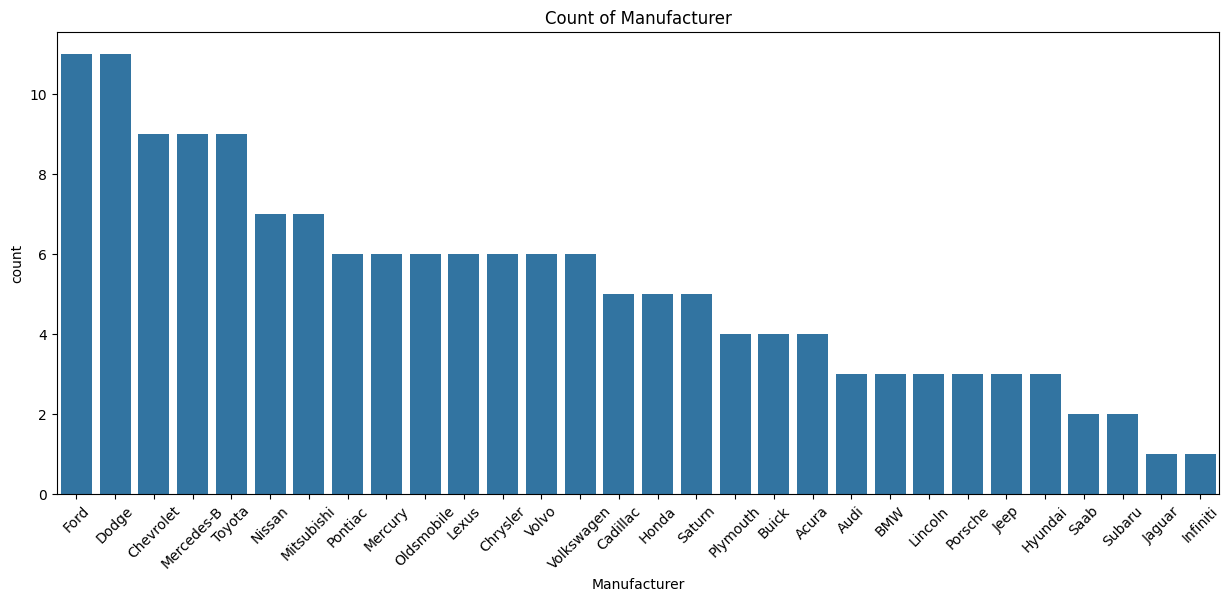

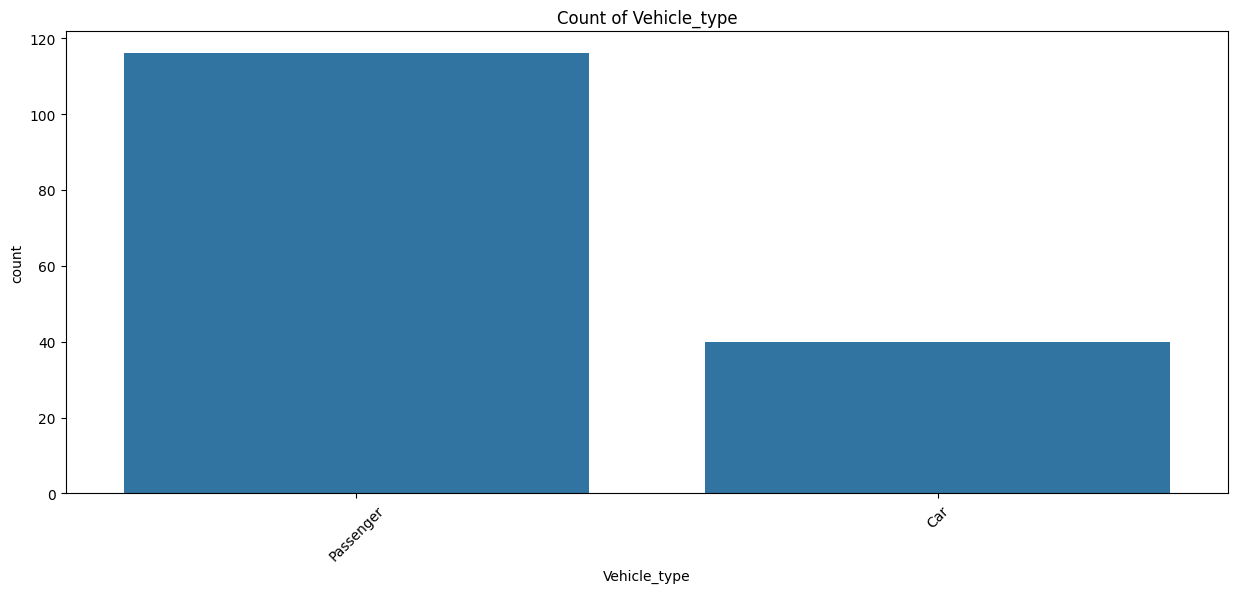

In [16]:
# Categorical Feature Analysis
cat_cols = ["Manufacturer", "Vehicle_type"]

for col in cat_cols:
    plt.figure(figsize=(15,6))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Count of {col}")
    plt.xticks(rotation=45)
    plt.show()


Index(['Sales_in_thousands', 'Year_resale_value', 'Price_in_thousands',
       'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length',
       'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor'],
      dtype='object')


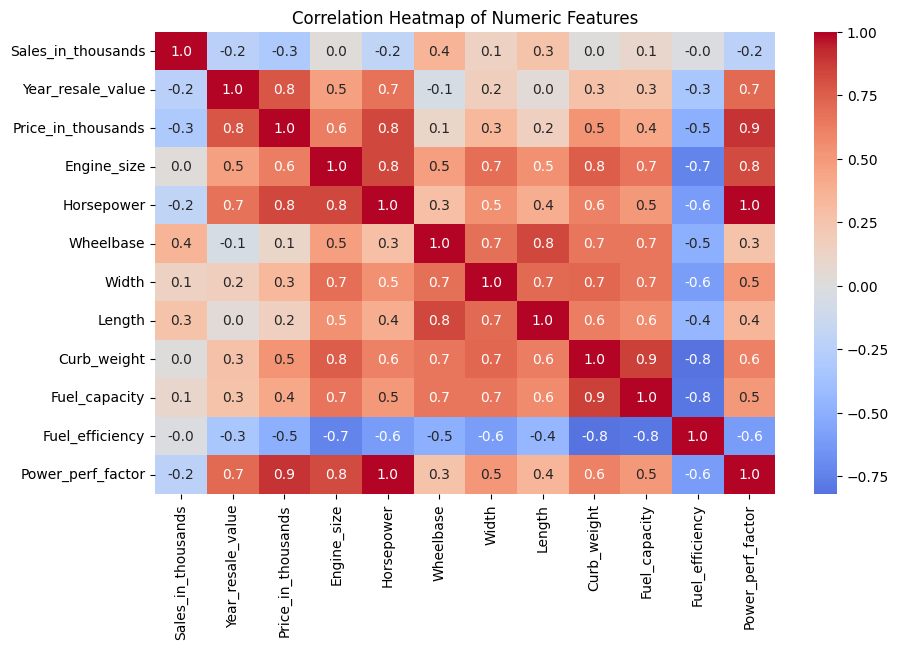

In [17]:
# Bivariate Analysis
# Correlation heatmap for numeric variables

numeric_cols = df.select_dtypes(include=np.number).columns
print(numeric_cols)
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0, fmt='.1f');
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

<Figure size 2000x600 with 0 Axes>

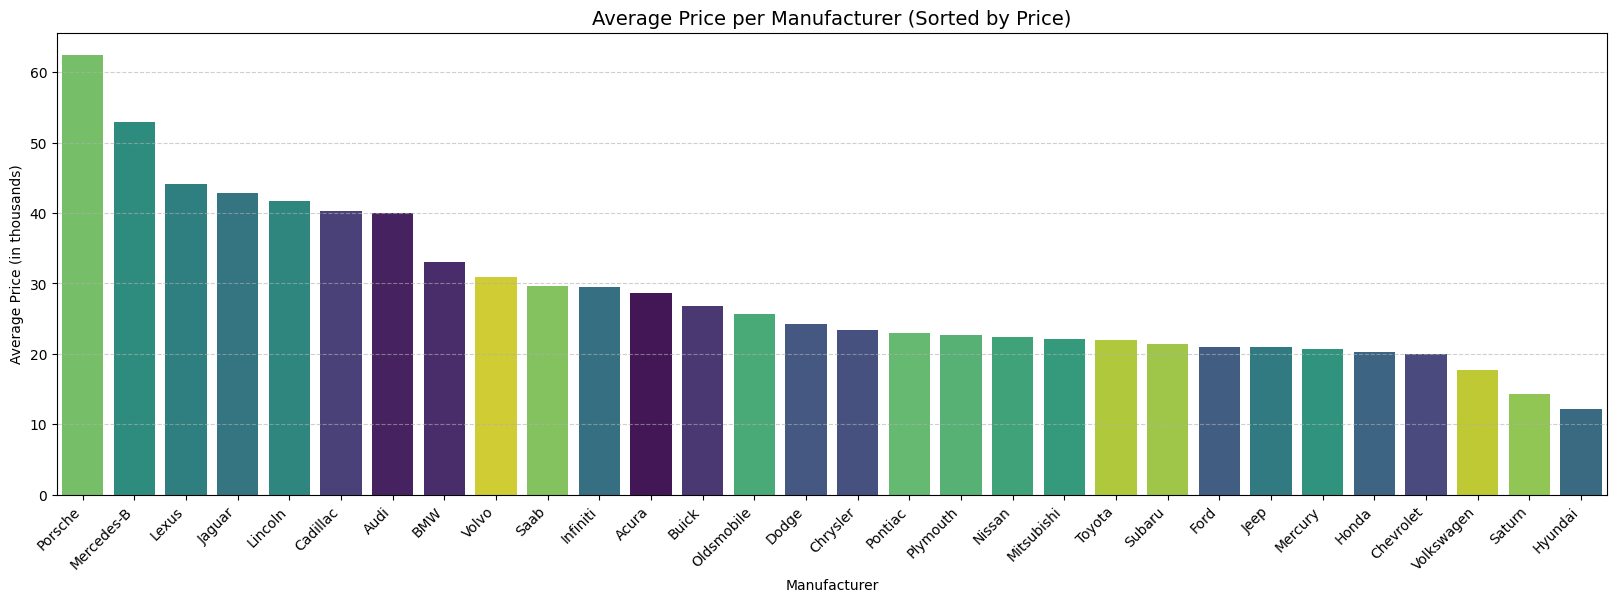

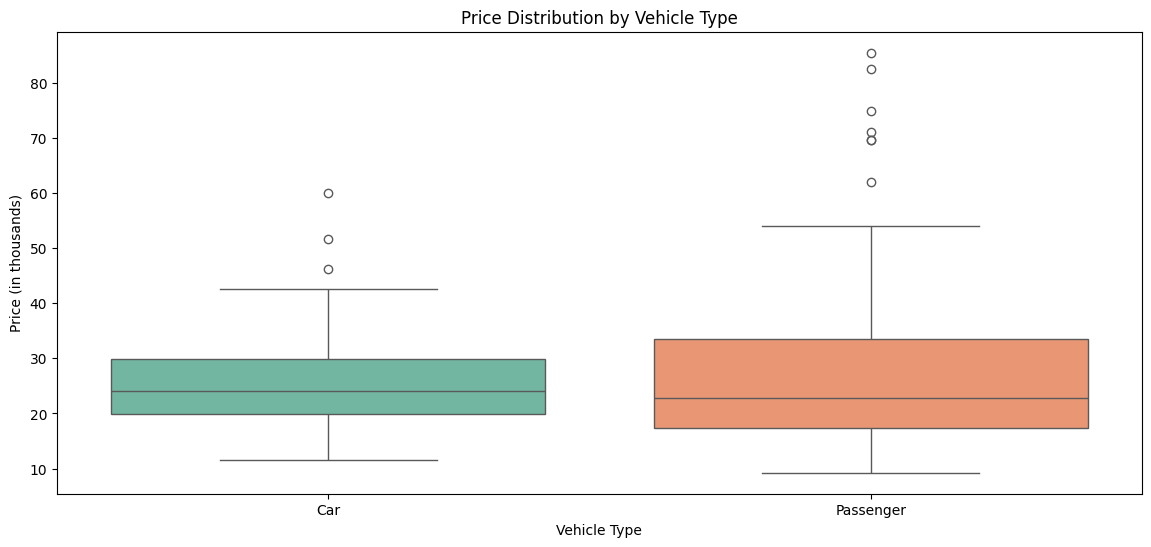

In [18]:
# Price Analysis (Categorical Features)
# Does Manufacturer significantly influence Price
# Which manufacturer has the highest average Price
# Average Price per Manufacturer (Barplot)
plt.figure(figsize=(20,6))

# Aggregate and sort by average price
manufacturer_price_df = (df.groupby('Manufacturer', observed=True)['Price_in_thousands']
                         .mean().sort_values(ascending=False).reset_index())

# Extract the sorted list of Manufacturer names for explicit order
manufacturer_order_list = manufacturer_price_df['Manufacturer']

plt.figure(figsize=(20,6))
# Plotting the pre-sorted DataFrame with explicit order
sns.barplot(
    data=manufacturer_price_df,
    x="Manufacturer",
    y="Price_in_thousands",
    order=manufacturer_order_list,  # guarantees sorting
    hue="Manufacturer",
    legend=False,
    palette='viridis'
);

plt.xticks(rotation=45, ha='right')
plt.title("Average Price per Manufacturer (Sorted by Price)", fontsize=14)
plt.xlabel("Manufacturer")
plt.ylabel("Average Price (in thousands)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Are prices linked to Vehicle_Type? (Boxplot for Price Distribution)
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x="Vehicle_type", y="Price_in_thousands", hue="Vehicle_type", palette='Set2');
plt.title("Price Distribution by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Price (in thousands)")
plt.show()


Selected price-driving features: ['Year_resale_value', 'Engine_size', 'Horsepower', 'Curb_weight', 'Fuel_efficiency', 'Power_perf_factor']


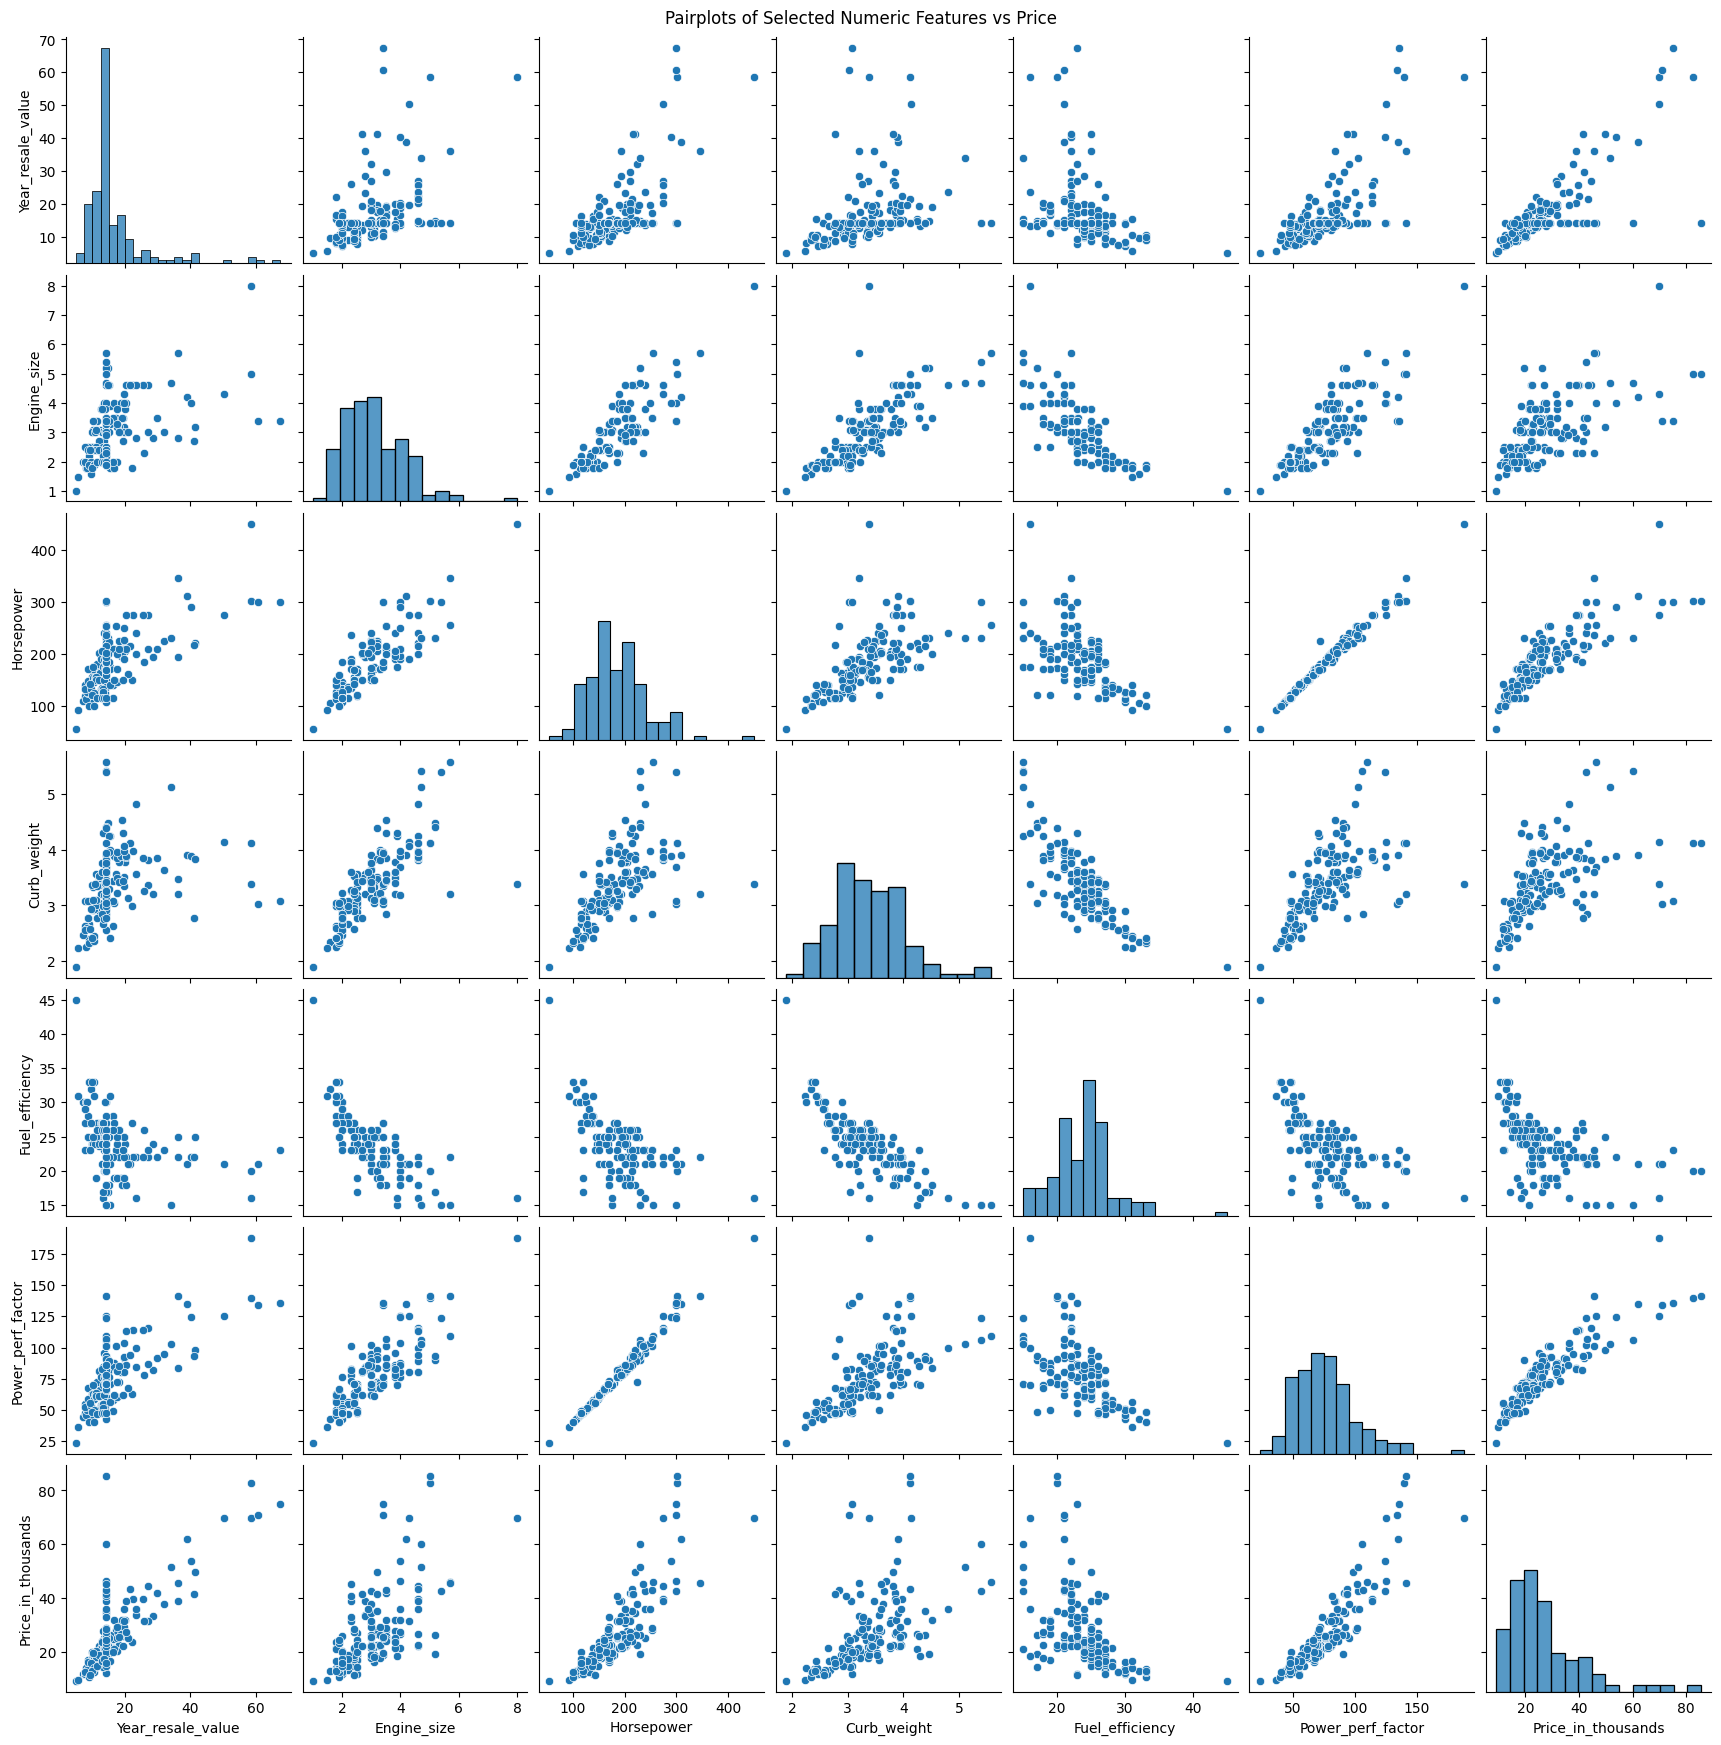

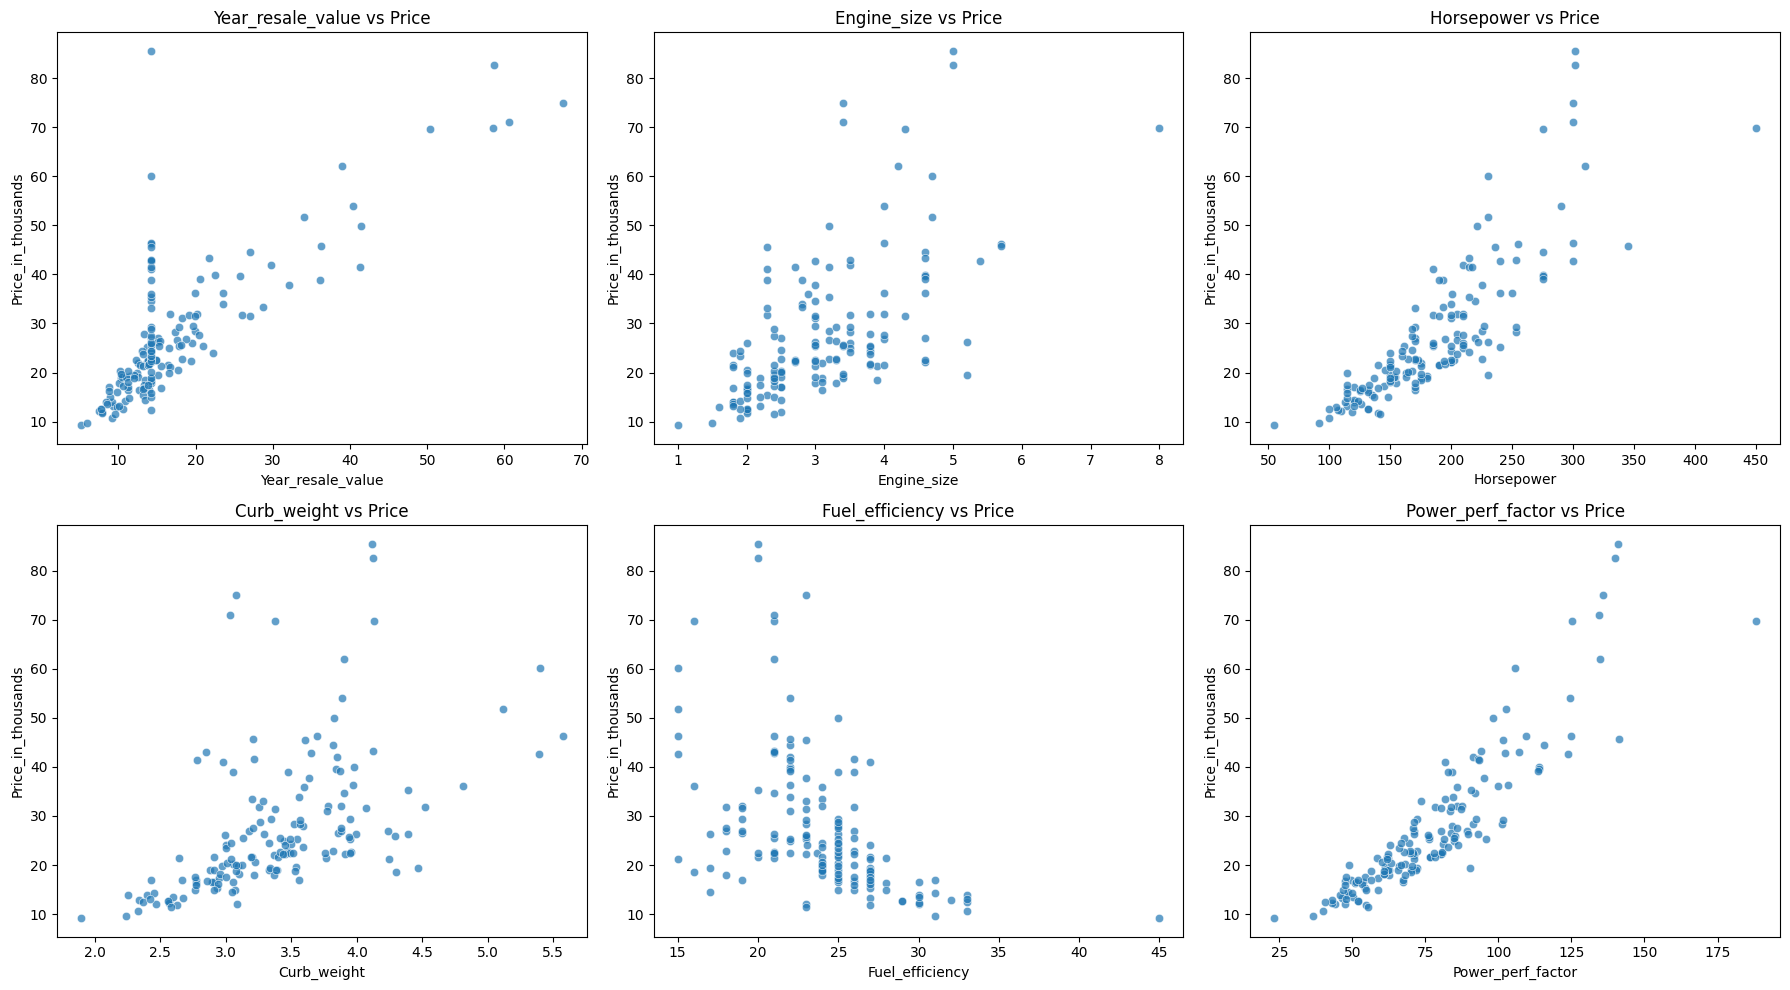

In [19]:
# What features influence car prices the most?

numeric_cols = df.select_dtypes(include=np.number).columns
corr_matrix = df[numeric_cols].corr().round(1)         # Correlation matrix

# Extract correlations with Price
price_corr = corr_matrix["Price_in_thousands"].drop("Price_in_thousands")

# Select features with |correlation| >= 0.5
selected_price_features = price_corr[price_corr.abs() >= 0.5].index.tolist()
print("Selected price-driving features:", selected_price_features)

# Pairplot of selected features + Price
sns.pairplot(df[selected_price_features + ["Price_in_thousands"]])
plt.suptitle("Pairplots of Selected Numeric Features vs Price", y=1)
plt.show()

# Scatterplots: all selected features vs Price in one figure
n_features = len(selected_price_features)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols  # auto-calc rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 5*n_rows))
axes = axes.flatten()

for i, feature in enumerate(selected_price_features):
    sns.scatterplot(x=feature, y="Price_in_thousands", data=df, ax=axes[i], alpha=0.7)
    axes[i].set_title(f"{feature} vs Price")

# Hide unused axes (if features < grid size)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

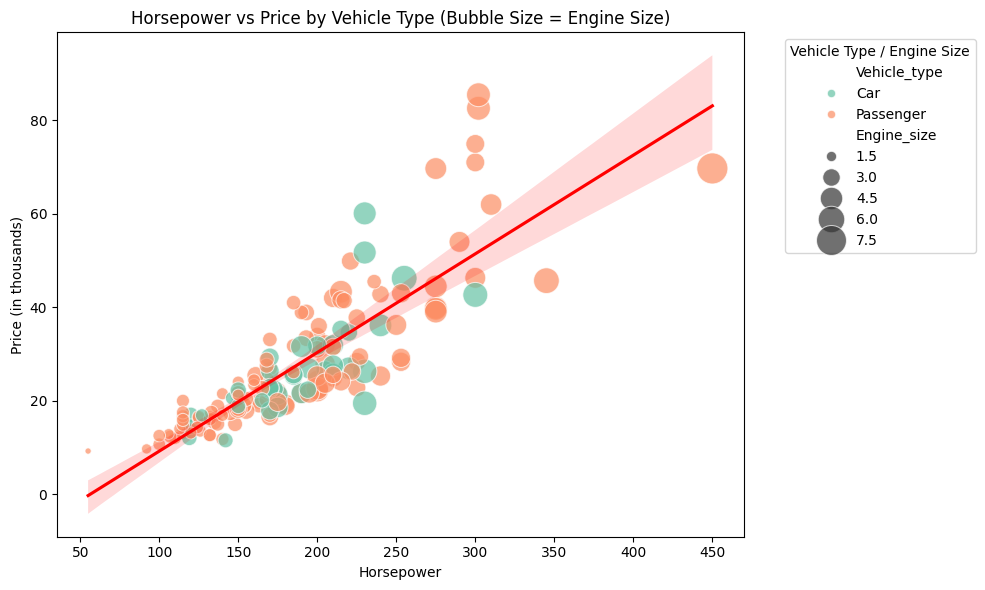

In [20]:
# Do more powerful cars command higher prices?
# Ensure required columns exist
required_cols = ['Horsepower', 'Price_in_thousands', 'Engine_size', 'Vehicle_type']
if all(col in df.columns for col in required_cols):

    # Scatterplot: Horsepower vs Price
    plt.figure(figsize=(10,6))
    sns.scatterplot(
        data=df,
        x='Horsepower',
        y='Price_in_thousands',
        hue='Vehicle_type',       # color by Vehicle Type
        size='Engine_size',       # size by Engine Size
        palette='Set2',
        alpha=0.7,
        sizes=(20, 500)
    )
    
    # Regression line (overall trend)
    sns.regplot(data=df, x='Horsepower', y='Price_in_thousands', scatter=False, color='red')
    
    plt.title("Horsepower vs Price by Vehicle Type (Bubble Size = Engine Size)")
    plt.xlabel("Horsepower")
    plt.ylabel("Price (in thousands)")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Vehicle Type / Engine Size")
    plt.tight_layout()
    plt.show()
    

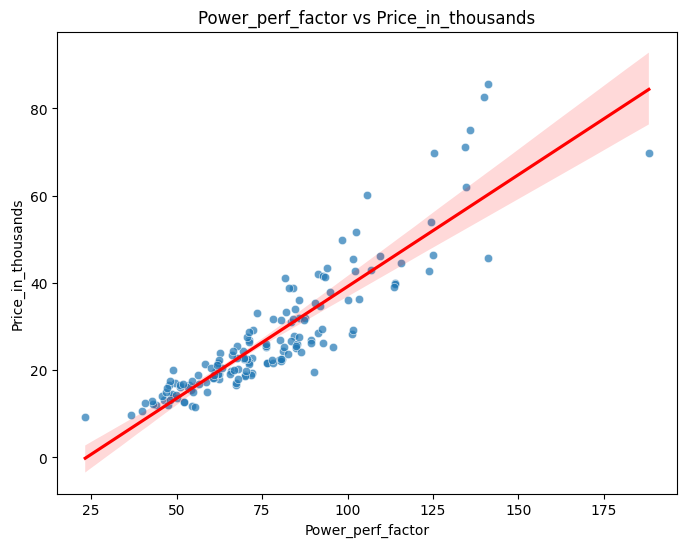

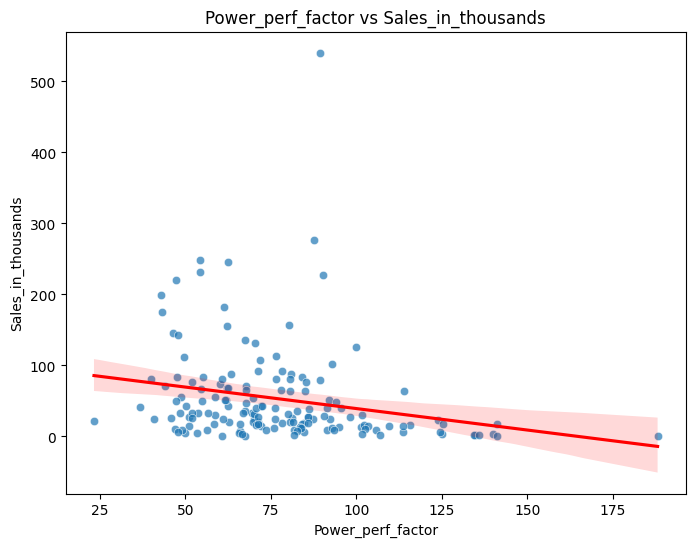

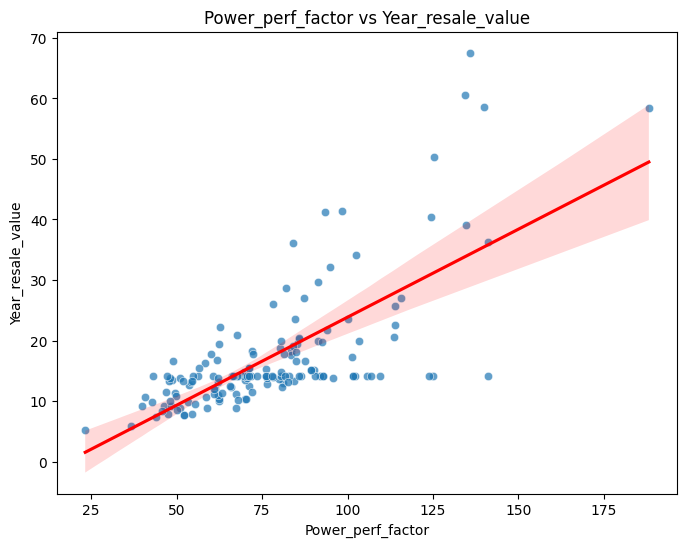

In [21]:
# Power_perf_factor vs. Key Business Metrics
# Addresses: Performance correlation with Price, Sales, and Resale.

# Define target variables
targets = ['Price_in_thousands', 'Sales_in_thousands', 'Year_resale_value']

for target in targets:
    if 'Power_perf_factor' in df.columns and target in df.columns:
        # Scatterplot with regression line
        plt.figure(figsize=(8,6))
        sns.scatterplot(data=df, x='Power_perf_factor', y=target, alpha=0.7)
        sns.regplot(data=df, x='Power_perf_factor', y=target, scatter=False, color='red')
        plt.title(f"Power_perf_factor vs {target}")
        plt.xlabel("Power_perf_factor")
        plt.ylabel(target)
        plt.show()


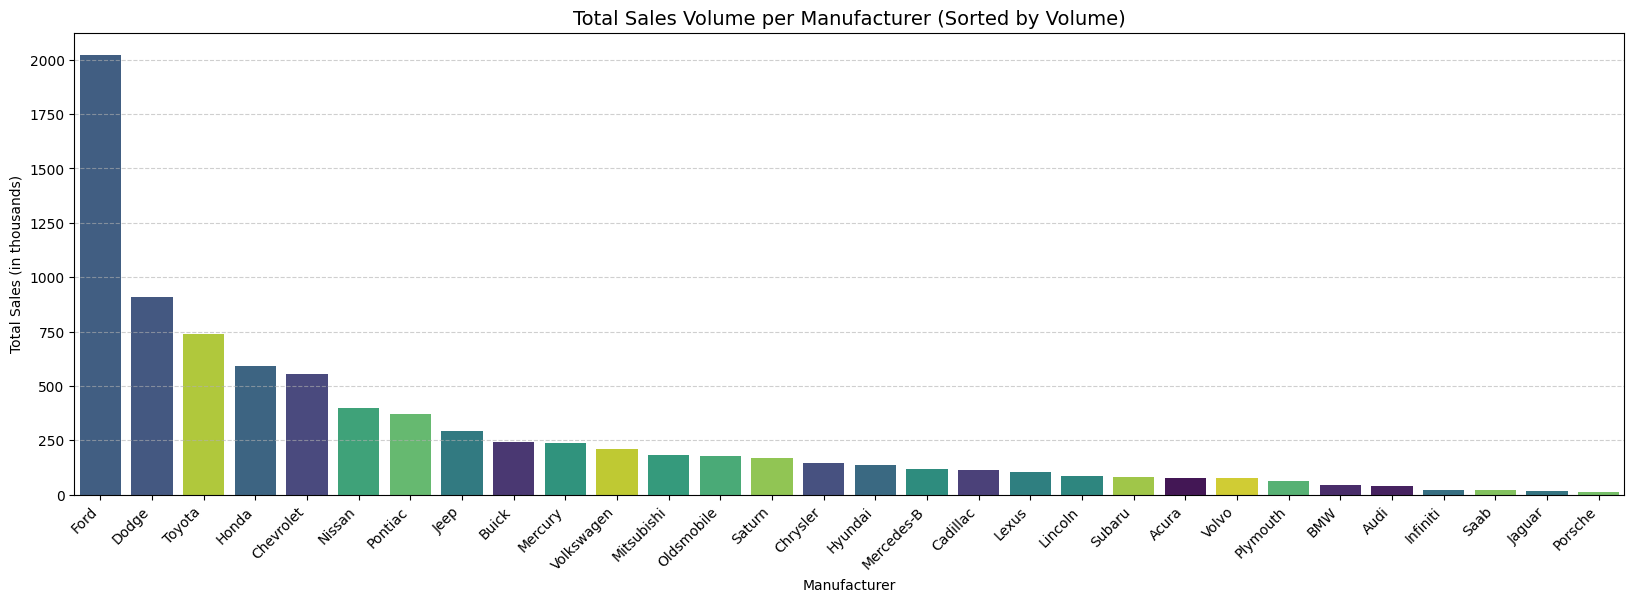

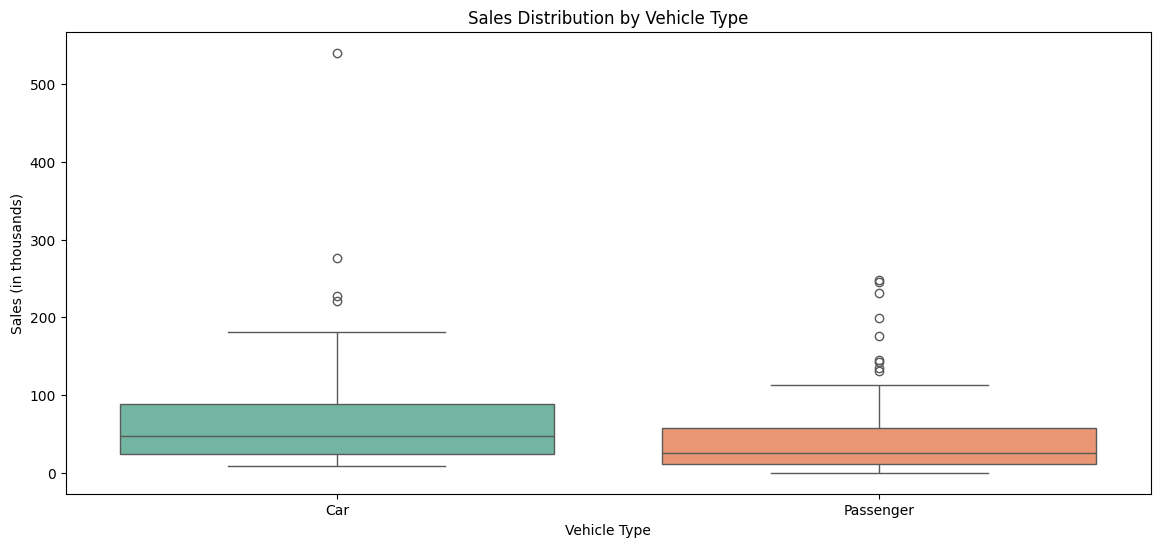

In [22]:
# Sales Analysis (Categorical Features)
# Does Manufacturer significantly influence Sales

# Which manufacturer dominates the sales volume
# Average Sales per Manufacturer (Barplot)
plt.figure(figsize=(20,6))

# Aggregate and sort by sales (creates the small, sorted summary table)
manufacturer_sales_df = (df.groupby('Manufacturer', observed=True)['Sales_in_thousands'].sum().sort_values(ascending=False).reset_index())

# Extract the sorted list of Manufacturer names for explicit order
manufacturer_order_list = manufacturer_sales_df['Manufacturer']

# Plotting the PRE-SORTED DataFrame with explicit order
sns.barplot(
    data=manufacturer_sales_df,
    x="Manufacturer",
    y="Sales_in_thousands",
    order=manufacturer_order_list, # GUARANTEES THE SORTING
    hue="Manufacturer", 
    legend=False,
    palette='viridis' 
)

plt.xticks(rotation=45, ha='right')
plt.title("Total Sales Volume per Manufacturer (Sorted by Volume)", fontsize=14)
plt.xlabel("Manufacturer")
plt.ylabel("Total Sales (in thousands)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Are sales linked to Vehicle_Type? (Boxplot for Sales Distribution)
# Vehicle Type vs Sales (Boxplot)
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x="Vehicle_type", y="Sales_in_thousands", hue="Vehicle_type", palette='Set2')
plt.xticks()
plt.title("Sales Distribution by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Sales (in thousands)")
plt.show()


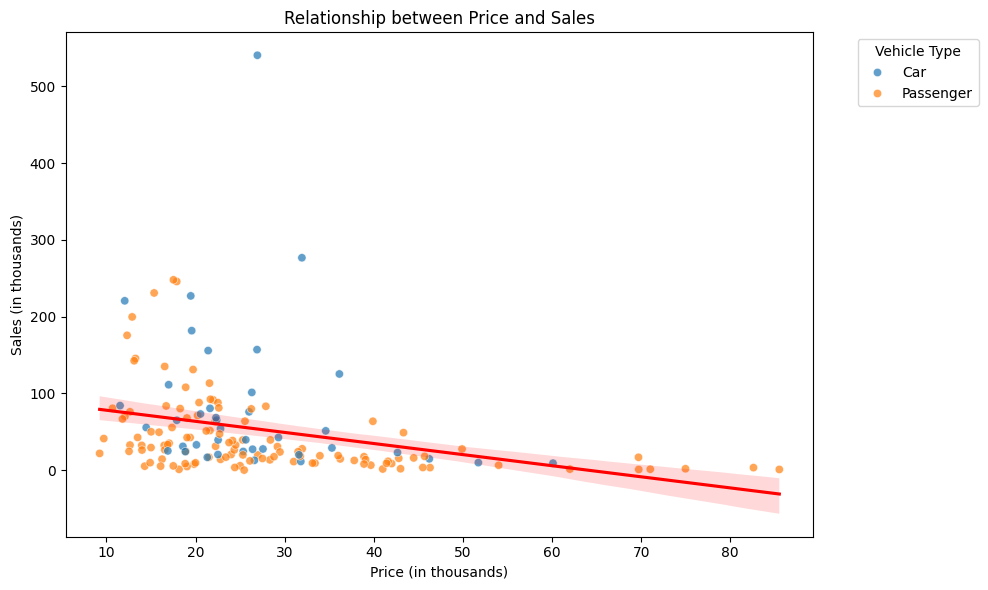

In [23]:
# What is the relationship between Price and Sales

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Price_in_thousands', y='Sales_in_thousands', hue='Vehicle_type',alpha=0.7)
sns.regplot(data=df, x='Price_in_thousands', y='Sales_in_thousands', scatter=False, color='red')
plt.title("Relationship between Price and Sales")
plt.xlabel("Price (in thousands)")
plt.ylabel("Sales (in thousands)")
plt.legend(title='Vehicle Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

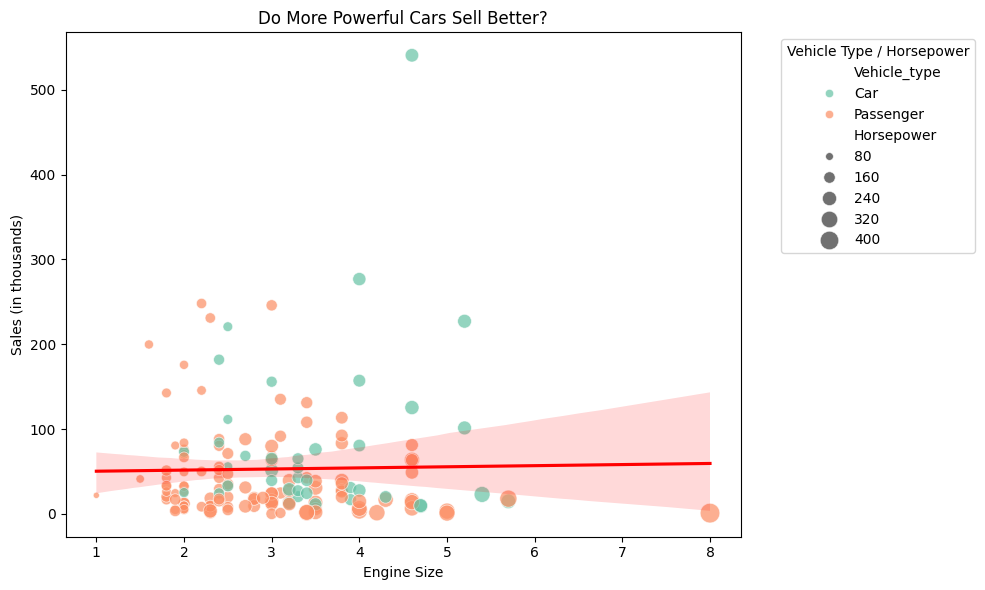

In [24]:
# Do more powerful cars sell better than smaller ones?
# Check required columns exist
required_cols = ['Engine_size', 'Horsepower', 'Sales_in_thousands', 'Vehicle_type']
if all(col in df.columns for col in required_cols):

    plt.figure(figsize=(10,6))
    sns.scatterplot(
        data=df,
        x='Engine_size',
        y='Sales_in_thousands',
        size='Horsepower',       # bubble size represents horsepower
        hue='Vehicle_type',      # color represents vehicle type
        alpha=0.7,
        sizes=(20, 200),
        palette='Set2'
    )
    
    # Regression line (overall trend)
    sns.regplot(data=df, x='Engine_size', y='Sales_in_thousands', scatter=False, color='red')
    
    plt.title("Do More Powerful Cars Sell Better?")
    plt.xlabel("Engine Size")
    plt.ylabel("Sales (in thousands)")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Vehicle Type / Horsepower")
    plt.tight_layout()
    plt.show()
    

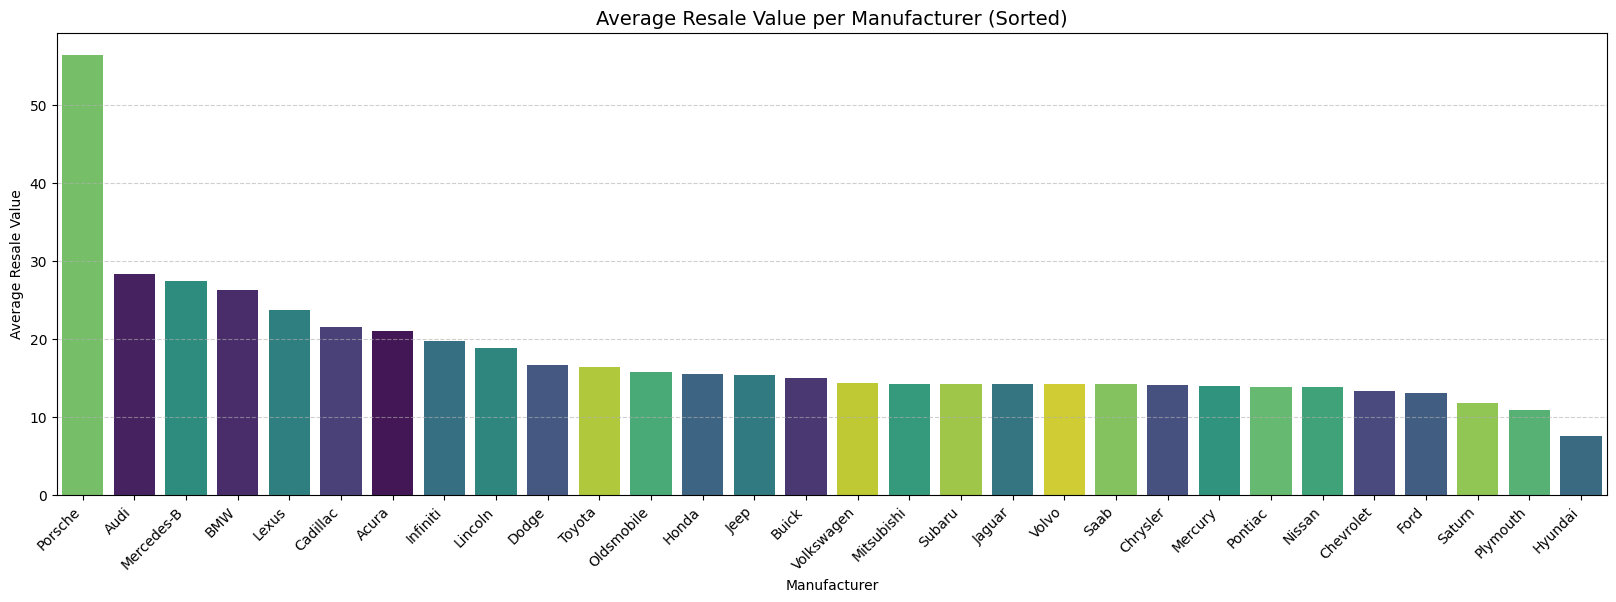

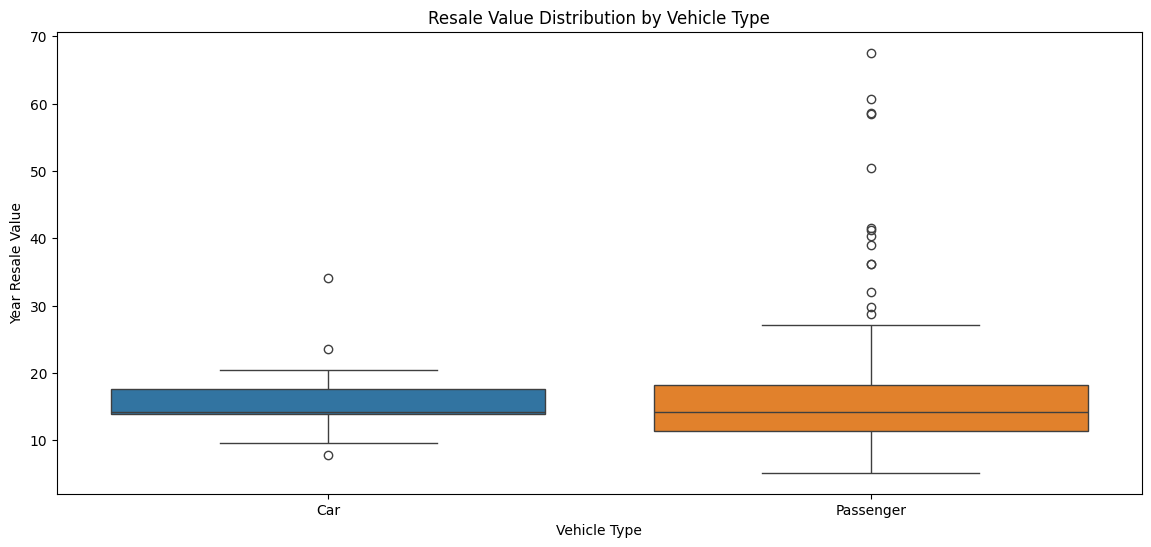

In [25]:
# Resales Analysis (Categorical Features)
# Does Manufacturer significantly influence Resales

# Which manufacturer dominates the resale values
# Average Resales Value per Manufacturer (Barplot)
plt.figure(figsize=(20,6))

# Aggregate and sort by sales (creates the small, sorted summary table)
manufacturer_resale_df = (df.groupby('Manufacturer', observed=True)['Year_resale_value'].mean().sort_values(ascending=False).reset_index())

# Extract the sorted list of Manufacturer names for explicit order
manufacturer_order_list = manufacturer_resale_df['Manufacturer']

# Plotting the PRE-SORTED DataFrame with explicit order
sns.barplot(
    data=manufacturer_resale_df,
    x="Manufacturer",
    y="Year_resale_value",
    order=manufacturer_order_list, # GUARANTEES THE SORTING
    hue="Manufacturer", 
    legend=False,
    palette='viridis' 
)

plt.xticks(rotation=45, ha='right')
plt.title("Average Resale Value per Manufacturer (Sorted)", fontsize=14)
plt.xlabel("Manufacturer")
plt.ylabel("Average Resale Value")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Are resales linked to Vehicle_Type? (Boxplot for ReSale Distribution)
# Vehicle Type vs Sales (Boxplot)
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x="Vehicle_type", y="Year_resale_value", hue="Vehicle_type")
plt.xticks()
plt.title("Resale Value Distribution by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Year Resale Value")
plt.show()


Selected price-driving features: ['Price_in_thousands', 'Engine_size', 'Horsepower', 'Power_perf_factor']


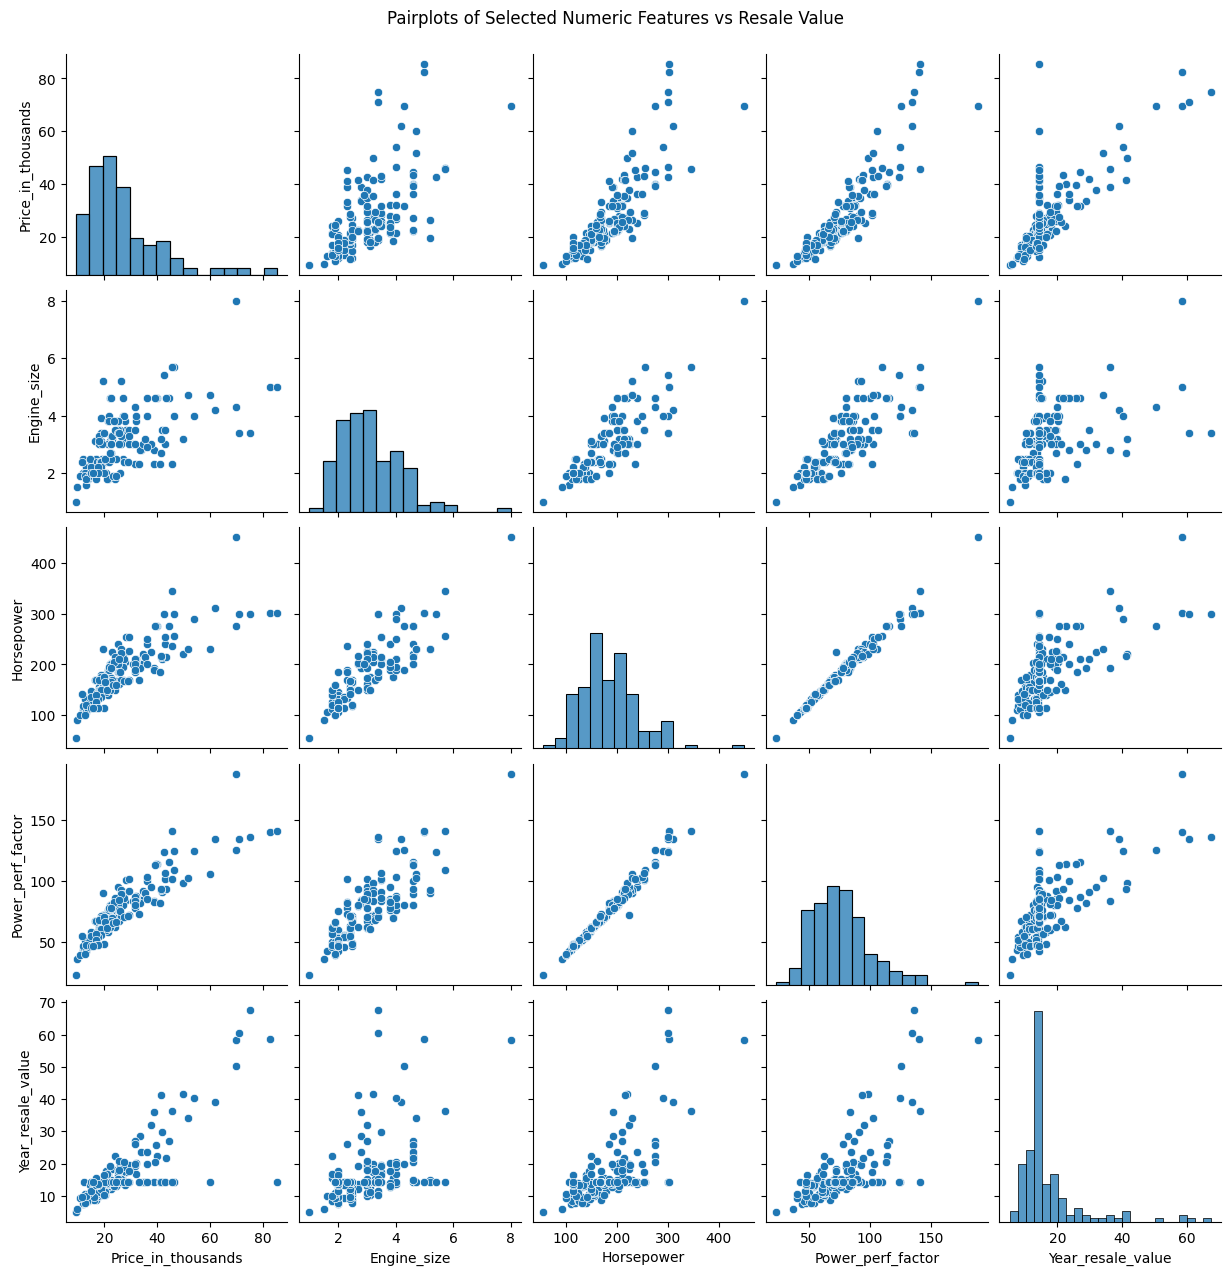

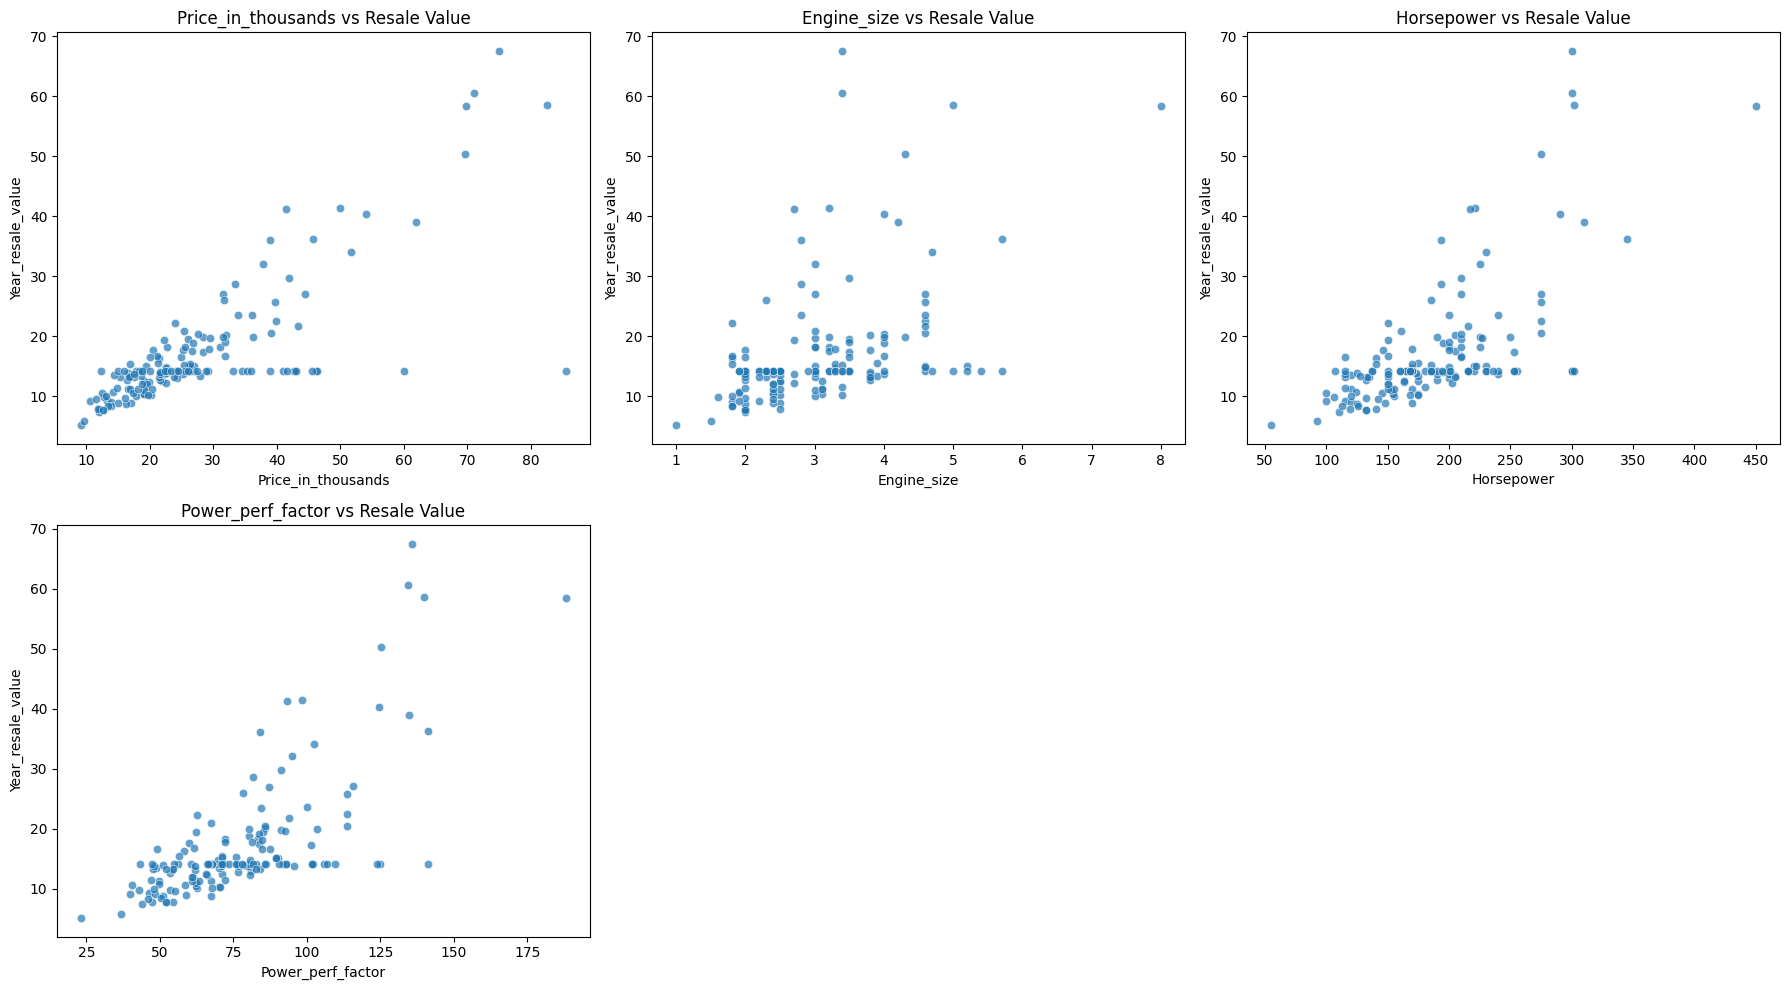

In [26]:
# Factors influencing car resales

# Step 1: Numeric features including target Resale value
numeric_cols = df.select_dtypes(include=np.number).columns

# Step 2: Correlation matrix
corr_matrix = df[numeric_cols].corr().round(1)

# Step 3: Extract correlations with Resale value
price_corr = corr_matrix["Year_resale_value"].drop("Year_resale_value")

# Step 4: Select features with |correlation| > 0.5
selected_price_features = price_corr[price_corr.abs() >= 0.5].index.tolist()

print("Selected price-driving features:", selected_price_features)

# Pairplot of selected features + Resale value
sns.pairplot(df[selected_price_features + ["Year_resale_value"]])
plt.suptitle("Pairplots of Selected Numeric Features vs Resale Value", y=1.02)
plt.show()

# Scatterplots: all selected features vs Resale value in one figure
n_features = len(selected_price_features)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols  # auto-calc rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 5*n_rows))
axes = axes.flatten()

for i, feature in enumerate(selected_price_features):
    sns.scatterplot(x=feature, y="Year_resale_value", data=df, ax=axes[i], alpha=0.7)
    axes[i].set_title(f"{feature} vs Resale Value")

# Hide unused axes (if features < grid size)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

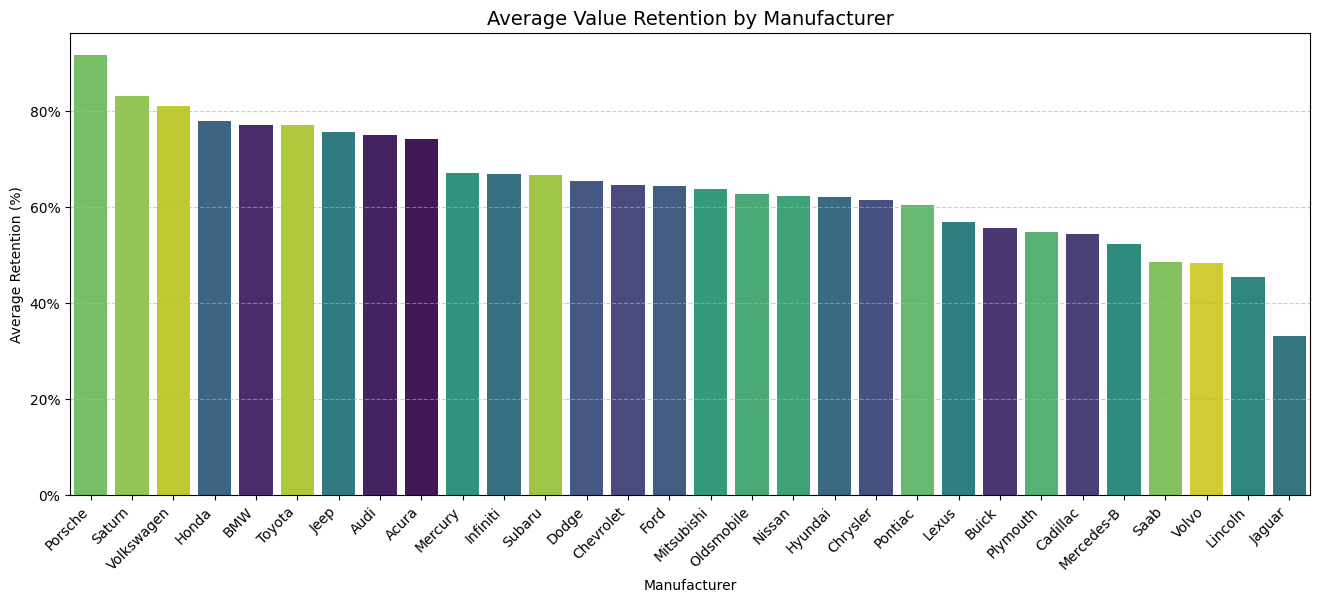

In [27]:
# Which manufacturers retain value best?
# Value Retention (% of original price)

if all(col in df.columns for col in ['Manufacturer', 'Price_in_thousands', 'Year_resale_value']):
    
    # Compute Retention Ratio = Resale / Price
    df['Retention_Ratio'] = df['Year_resale_value'] / df['Price_in_thousands']
    
    # Group by manufacturer and calculate average retention ratio
    retention_df = (df.groupby('Manufacturer', observed=True)['Retention_Ratio']
                      .mean()
                      .sort_values(ascending=False)
                      .reset_index())
    
    # Extract sorted manufacturer order
    manu_order = retention_df['Manufacturer']
    
    # Plot results (sorted by Retention_Ratio)
    plt.figure(figsize=(16,6))
    sns.barplot(
        data=retention_df,
        x='Manufacturer',
        y='Retention_Ratio',
        hue='Manufacturer',      # explicit hue
        order=manu_order,        # ensures sorted order
        legend=False,
        palette='viridis'
    )
    plt.xticks(rotation=45, ha='right')
    plt.title("Average Value Retention by Manufacturer", fontsize=14)
    plt.xlabel("Manufacturer")
    plt.ylabel("Average Retention (%)")
    
    # Format y-axis as percentage
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.show()
   


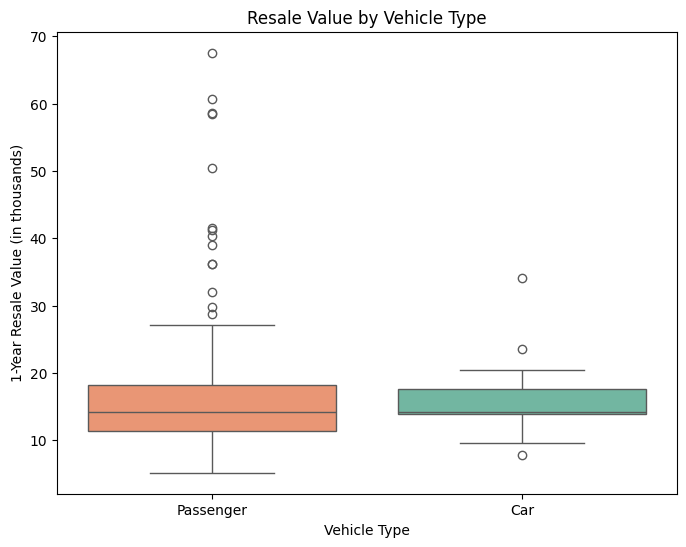

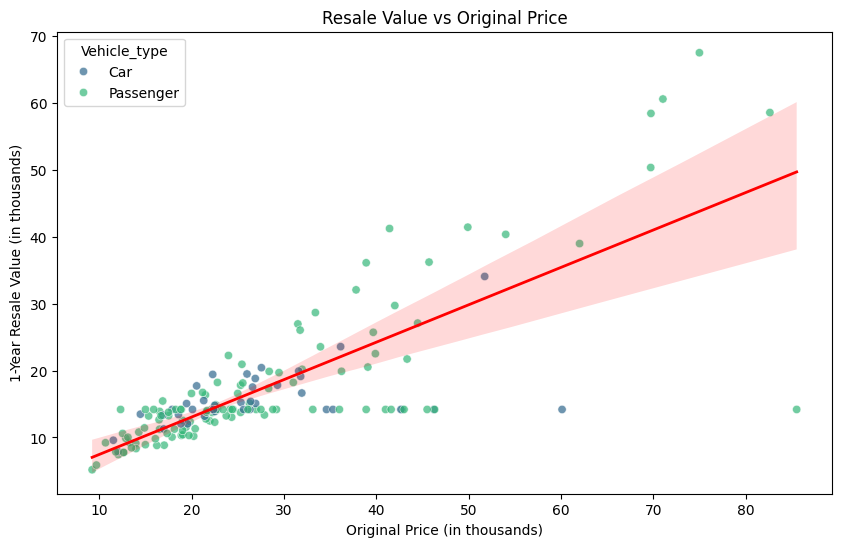

In [28]:
# Resale Value Analysis

# Does vehicle type (Passenger vs Car) affect depreciation?
# Resale by Vehicle Type
vehicle_types = df['Vehicle_type'].unique()
plt.figure(figsize=(8,6))
sns.boxplot(
data=df,
x='Vehicle_type',
y='Year_resale_value',
hue='Vehicle_type',
order=vehicle_types,
palette='Set2'
)
plt.title("Resale Value by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("1-Year Resale Value (in thousands)")
plt.show()
    
# Resale vs Original Price with regression line
plt.figure(figsize=(10,6))
sns.scatterplot(
        data=df,
        x='Price_in_thousands',
        y='Year_resale_value',
        hue='Vehicle_type',
        palette='viridis',
        alpha=0.7
)
sns.regplot(
        data=df,
        x='Price_in_thousands',
        y='Year_resale_value',
        scatter=False,
        color='red',
        line_kws={'linewidth':2}
    )
plt.title("Resale Value vs Original Price")
plt.xlabel("Original Price (in thousands)")
plt.ylabel("1-Year Resale Value (in thousands)")
plt.show()


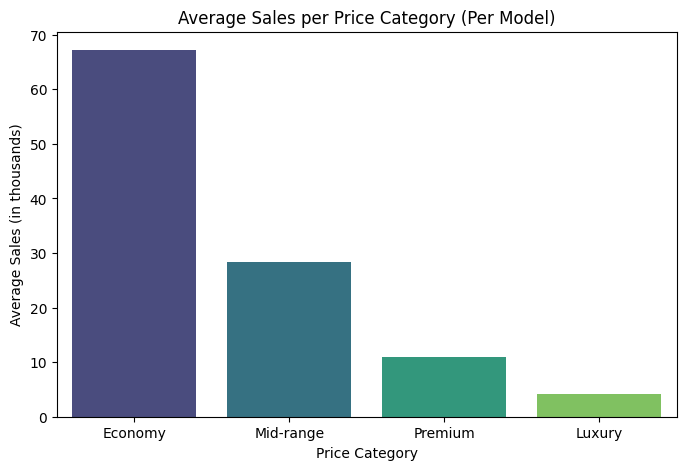

In [29]:
# Are higher-priced cars sold less than mid-range or economy cars?
# Ensure Price_Category exists using dataset min/max
min_price = df["Price_in_thousands"].min()
max_price = df["Price_in_thousands"].max()

bins = np.linspace(min_price, max_price, 5)  # 4 intervals
labels = ["Economy","Mid-range","Premium","Luxury"]

df["Price_Category"] = pd.cut(df["Price_in_thousands"], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(8,5))
sns.barplot(
    data=df,
    x="Price_Category",
    y="Sales_in_thousands",
    estimator=np.mean,   # Seaborn calculates average
    hue="Price_Category",
    errorbar=None,
    palette="viridis",
    dodge=False
)
plt.title("Average Sales per Price Category (Per Model)")
plt.xlabel("Price Category")
plt.ylabel("Average Sales (in thousands)")
plt.show()

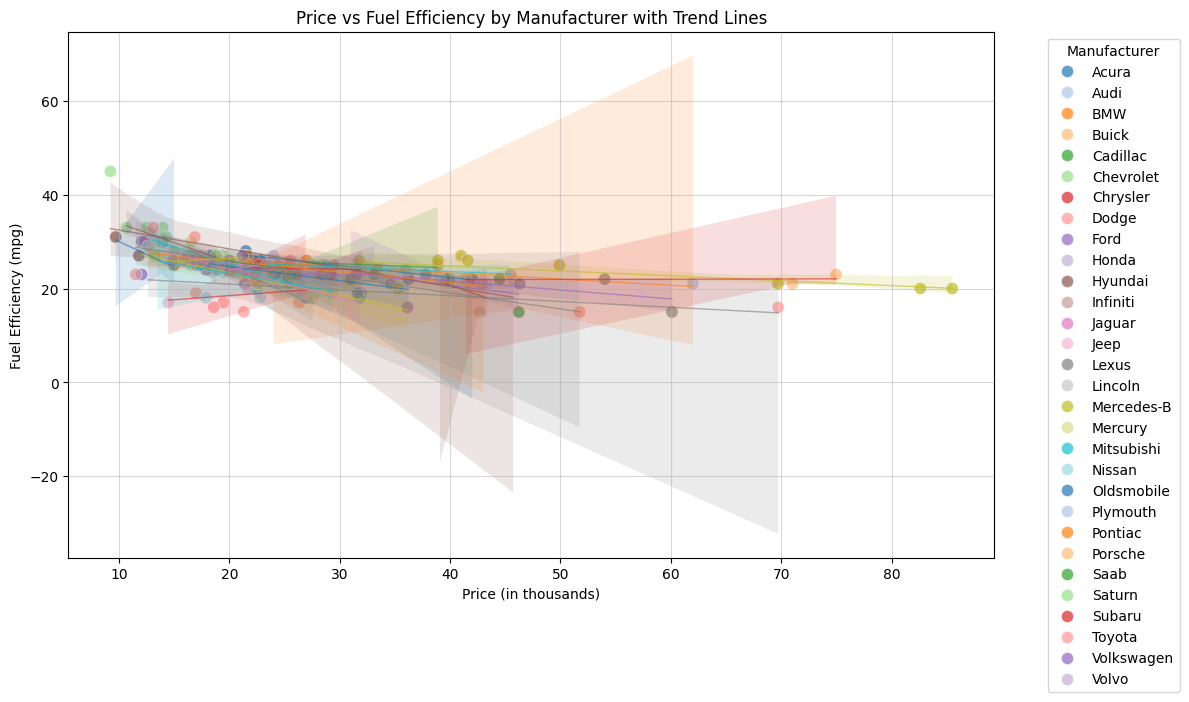

In [30]:
# Design and Efficiency Trade-Off
# How do a car’s price and fuel efficiency relate, and does this relationship differ by manufacturer?

# Ensure required columns exist
required_cols = ['Price_in_thousands', 'Fuel_efficiency', 'Manufacturer']
if all(col in df.columns for col in required_cols):

    plt.figure(figsize=(12,7))
    
    # Scatter points colored by Manufacturer
    sns.scatterplot(
        data=df,
        x='Price_in_thousands',
        y='Fuel_efficiency',
        hue='Manufacturer',
        palette='tab20',
        alpha=0.7,
        s=80
    )
    
    # Add regression lines per Manufacturer
    manufacturers = df['Manufacturer'].unique()
    for manu in manufacturers:
        manu_data = df[df['Manufacturer'] == manu]
        sns.regplot(
            data=manu_data,
            x='Price_in_thousands',
            y='Fuel_efficiency',
            scatter=False,
            label=None,  # avoid extra legend entries
            line_kws={'linewidth':1, 'alpha':0.6}
        )
    
    plt.title("Price vs Fuel Efficiency by Manufacturer with Trend Lines")
    plt.xlabel("Price (in thousands)")
    plt.ylabel("Fuel Efficiency (mpg)")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Manufacturer")
    plt.grid(alpha=0.5)
    plt.tight_layout()
    plt.show()

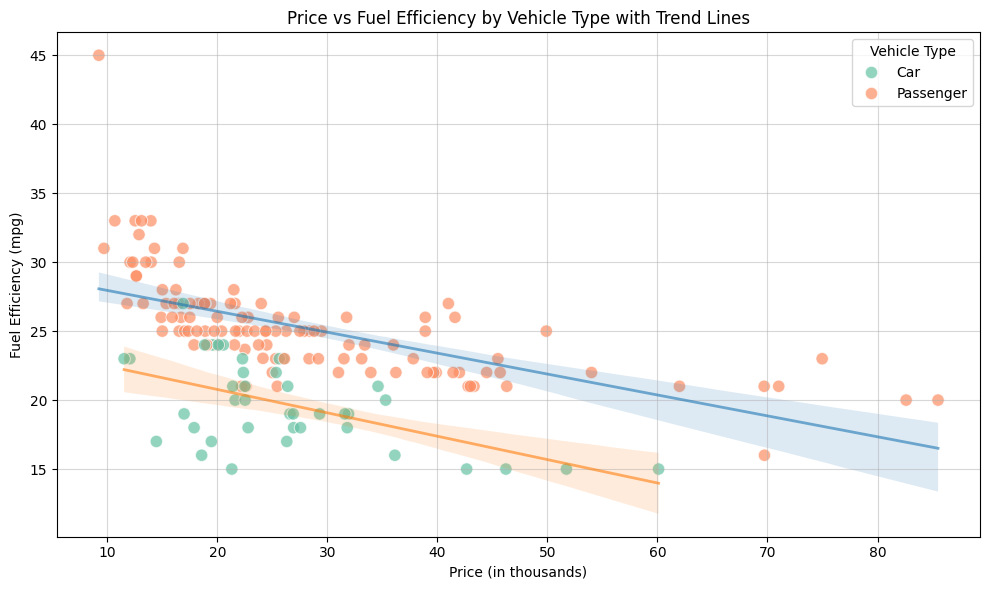

In [31]:
# Design and Efficiency Trade-Off
# How do a car’s price and fuel efficiency relate, and does this relationship differ by Vehicle Type?

# Ensure required columns exist
required_cols = ['Price_in_thousands', 'Fuel_efficiency', 'Vehicle_type']
if all(col in df.columns for col in required_cols):

    plt.figure(figsize=(10,6))
    
    # Scatter points colored by Vehicle Type
    sns.scatterplot(
        data=df,
        x='Price_in_thousands',
        y='Fuel_efficiency',
        hue='Vehicle_type',
        palette='Set2',
        alpha=0.7,
        s=80
    )
    
    # Add regression lines per Vehicle Type
    vehicle_types = df['Vehicle_type'].unique()
    for vtype in vehicle_types:
        vtype_data = df[df['Vehicle_type'] == vtype]
        sns.regplot(
            data=vtype_data,
            x='Price_in_thousands',
            y='Fuel_efficiency',
            scatter=False,
            label=None,  # avoid duplicate legend entries
            line_kws={'linewidth':2, 'alpha':0.6}
        )
    
    plt.title("Price vs Fuel Efficiency by Vehicle Type with Trend Lines")
    plt.xlabel("Price (in thousands)")
    plt.ylabel("Fuel Efficiency (mpg)")
    plt.legend(title="Vehicle Type")
    plt.grid(alpha=0.5)
    plt.tight_layout()
    plt.show()

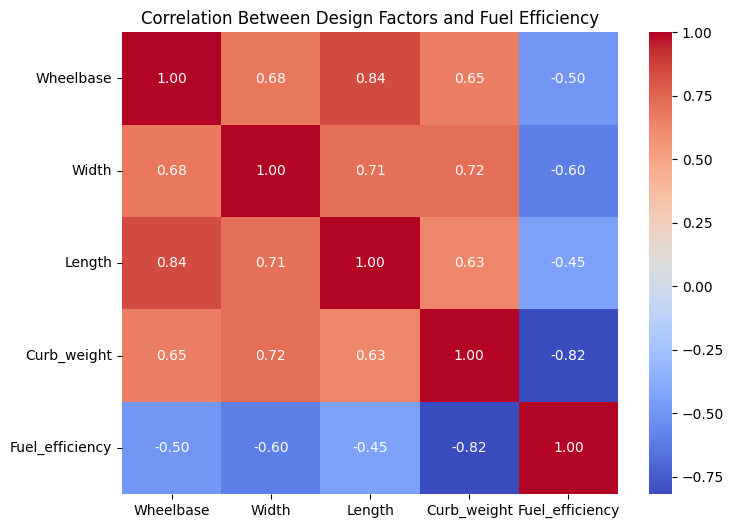

In [32]:
# How do design factors (Wheelbase, Width, Length, Curb_weight) influence fuel efficiency?

# Correlation heatmap (optional summary)
corr_cols = ['Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_efficiency']
corr_matrix = df[corr_cols].corr()
    
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Between Design Factors and Fuel Efficiency")
plt.show()


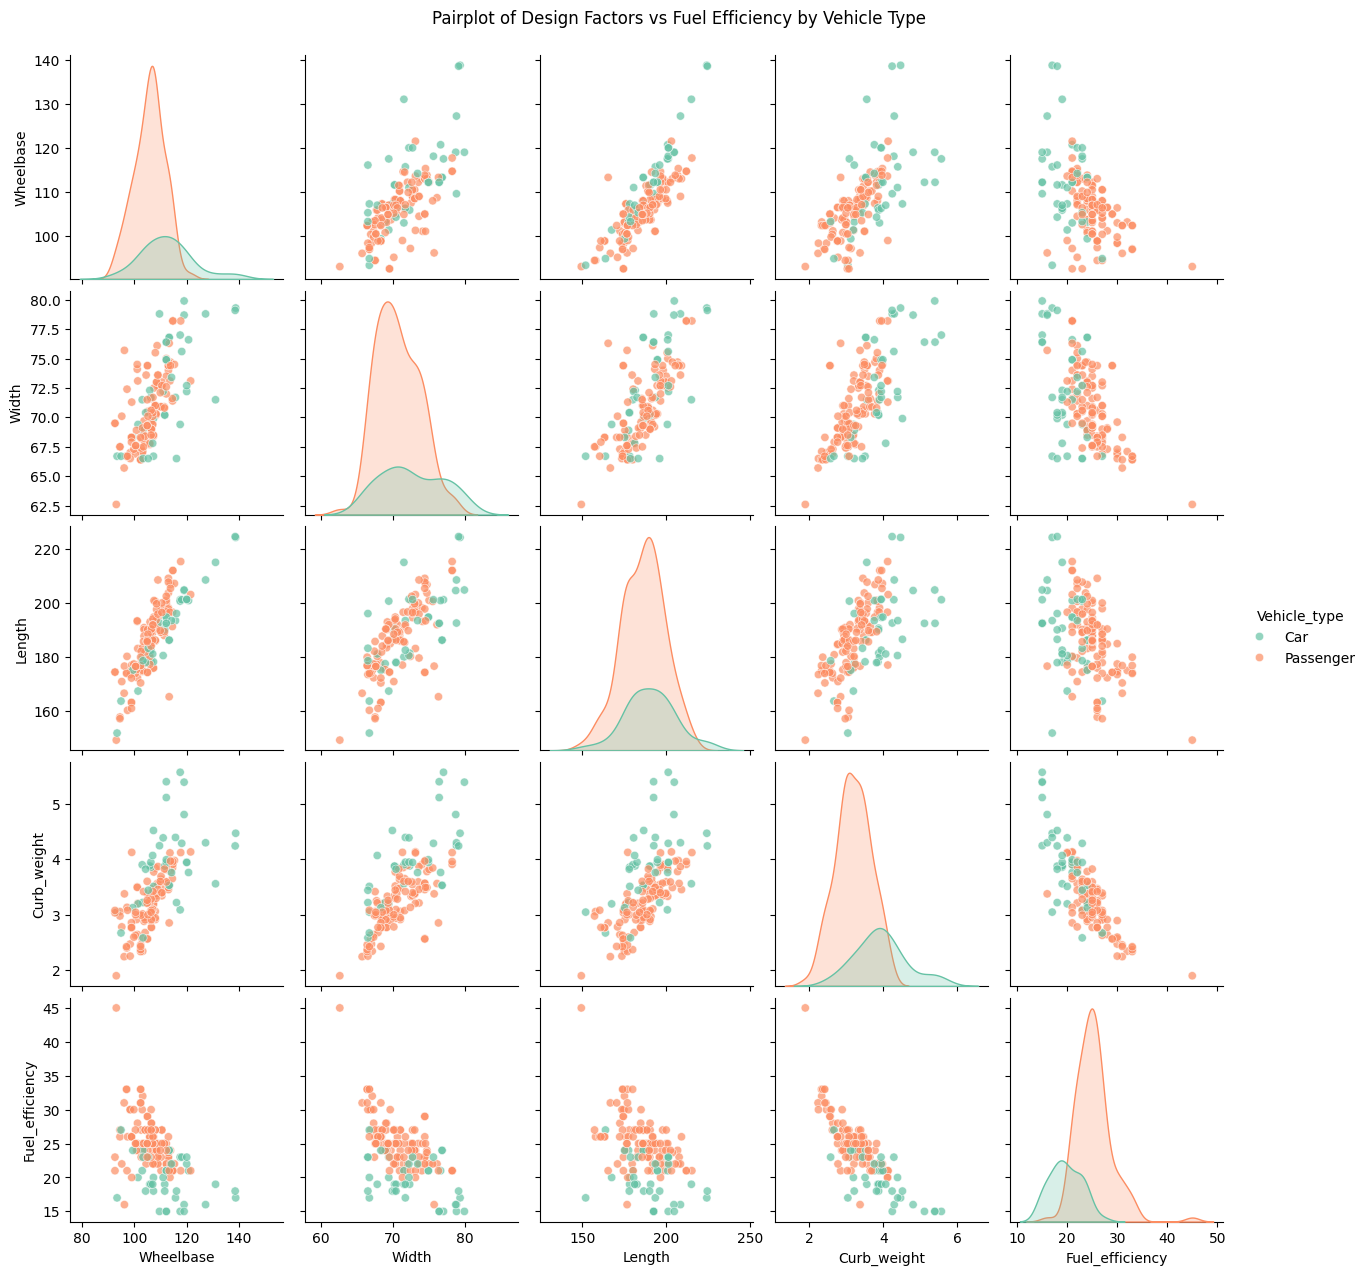

In [33]:
# How do design factors (Wheelbase, Width, Length, Curb_weight) influence fuel efficiency?
#pairplot

# Select relevant columns
cols = ['Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_efficiency', 'Vehicle_type']

# Pairplot
sns.pairplot(
    df[cols],
    hue='Vehicle_type',
    palette='Set2',
    diag_kind='kde',        # Kernel density estimate for the diagonal
    plot_kws={'alpha':0.7}  # Transparency for points
)
plt.suptitle("Pairplot of Design Factors vs Fuel Efficiency by Vehicle Type", y=1.02)
plt.show()


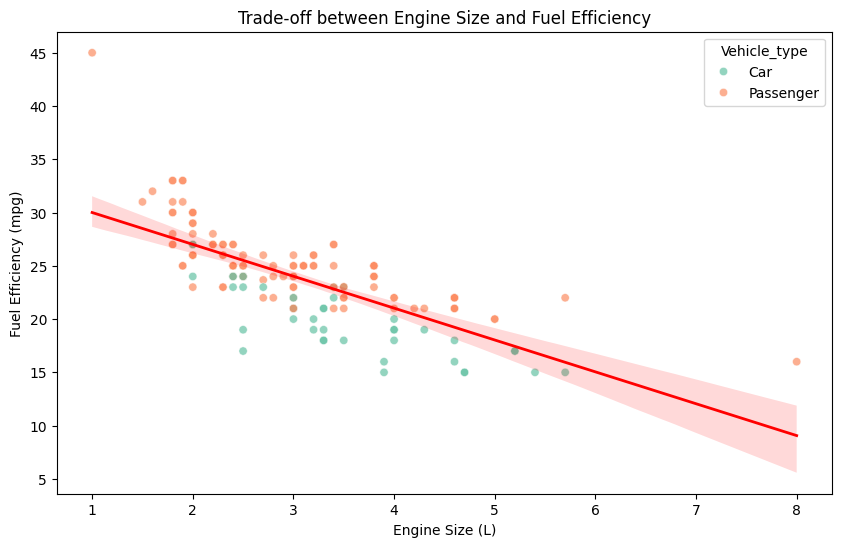

In [34]:
# What is the trade-off between Engine_size and Fuel_efficiency?

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='Engine_size',
    y='Fuel_efficiency',
    hue='Vehicle_type',   # Color by vehicle type
    palette='Set2',
    alpha=0.7
)

# Optional regression line for overall trend
sns.regplot(
    data=df,
    x='Engine_size',
    y='Fuel_efficiency',
    scatter=False,
    color='red',
    line_kws={'linewidth':2}
)

plt.title("Trade-off between Engine Size and Fuel Efficiency")
plt.xlabel("Engine Size (L)")
plt.ylabel("Fuel Efficiency (mpg)")
plt.show()


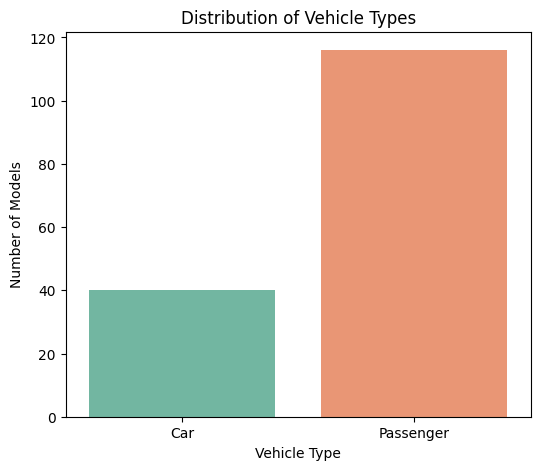

In [35]:
# What is the distribution of vehicle types?

# Count of each vehicle type
vehicle_counts = df['Vehicle_type'].value_counts()

# Bar plot
plt.figure(figsize=(6,5))
sns.countplot(data=df, x='Vehicle_type', hue='Vehicle_type', palette='Set2')
plt.title("Distribution of Vehicle Types")
plt.xlabel("Vehicle Type")
plt.ylabel("Number of Models")
plt.show()



Cluster Centers (approximate feature values):
   Price_in_thousands  Engine_size  Horsepower  Fuel_efficiency  Curb_weight
0           21.075897     2.463793  156.241379        24.925426     3.115776
1           55.868316     4.763158  291.000000        19.526316     4.123385
2           29.272690     3.539655  206.344828        21.638421     3.727793
3           13.650000     1.847619  116.619048        30.809524     2.482810
Cluster_Label
Family         58
Luxury         58
Economy        21
Performance    19
Name: count, dtype: int64


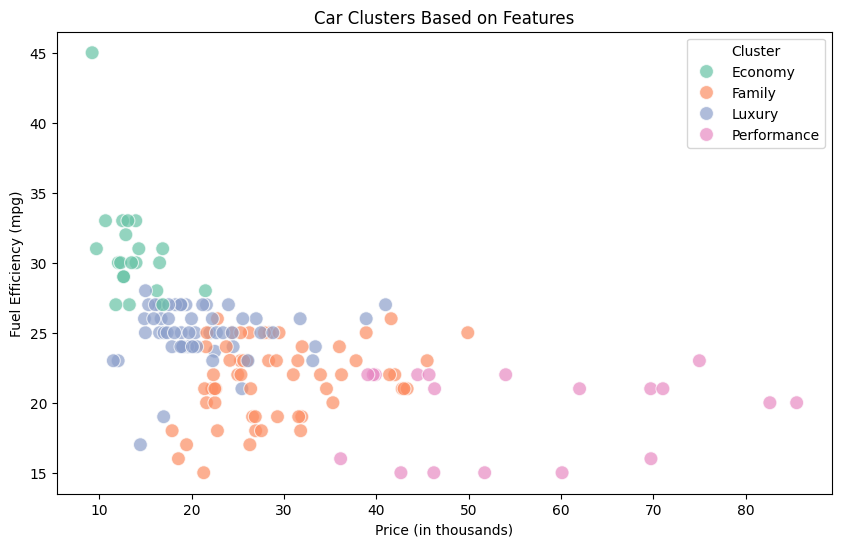

'\nExplanation of the clusters (based on features):\n\nEconomy\n\nLow price, high fuel efficiency, moderate engine size and horsepower.\n\nExample: Small city cars or compact sedans.\n\nFamily\n\nModerate price, higher curb weight, decent fuel efficiency.\n\nExample: SUVs, minivans, or family sedans.\n\nPerformance\n\nHigh horsepower, larger engines, lower fuel efficiency.\n\nExample: Sports cars, performance sedans.\n\nLuxury\n\nHigh price, moderate fuel efficiency, premium features (not necessarily extreme horsepower).\n\nExample: Luxury sedans, SUVs with comfort-focused features.\n'

In [36]:
# Can cars be clustered into natural groups (economy, family, performance, luxury)?


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select features relevant for clustering
features = ['Price_in_thousands', 'Engine_size', 'Horsepower', 'Fuel_efficiency', 'Curb_weight']
X = df[features].copy()

# Handle missing values (if any)
X = X.fillna(X.mean())

# Standardize features (important for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Inspect cluster centers
centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features)
print("Cluster Centers (approximate feature values):")
print(centers)

# Label clusters based on their characteristics
# We analyze the centers to assign meaningful names
cluster_labels = {}
for i, row in centers.iterrows():
    if row['Price_in_thousands'] <= 25 and row['Fuel_efficiency'] >= 25:
        cluster_labels[i] = 'Economy'
    elif row['Price_in_thousands'] <= 40 and row['Curb_weight'] >= 3.3:
        cluster_labels[i] = 'Family'
    elif row['Horsepower'] >= 250:
        cluster_labels[i] = 'Performance'
    else:
        cluster_labels[i] = 'Luxury'

# Map numeric clusters to descriptive labels
df['Cluster_Label'] = df['Cluster'].map(cluster_labels)

# Count of models per cluster
print(df['Cluster_Label'].value_counts())

# Visualize clusters
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df, 
    x='Price_in_thousands', 
    y='Fuel_efficiency', 
    hue='Cluster_Label',
    palette='Set2',
    s=100,
    alpha=0.7
)
plt.title("Car Clusters Based on Features")
plt.xlabel("Price (in thousands)")
plt.ylabel("Fuel Efficiency (mpg)")
plt.legend(title="Cluster")
plt.show()


"""
Explanation of the clusters (based on features):

Economy

Low price, high fuel efficiency, moderate engine size and horsepower.

Example: Small city cars or compact sedans.

Family

Moderate price, higher curb weight, decent fuel efficiency.

Example: SUVs, minivans, or family sedans.

Performance

High horsepower, larger engines, lower fuel efficiency.

Example: Sports cars, performance sedans.

Luxury

High price, moderate fuel efficiency, premium features (not necessarily extreme horsepower).

Example: Luxury sedans, SUVs with comfort-focused features.
"""

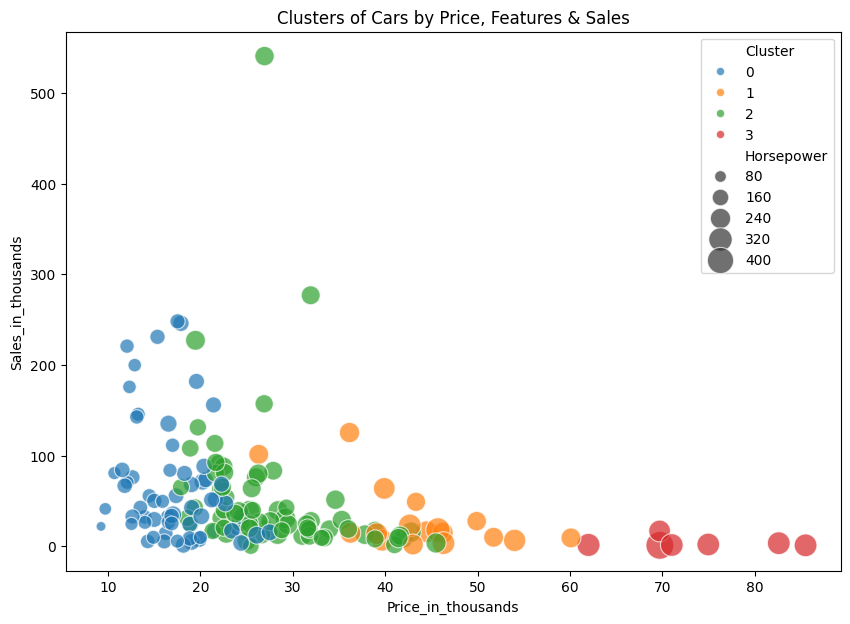

            Manufacturer  Price_in_thousands  Sales_in_thousands
Cluster                                                         
0       137       Toyota              17.518             247.994
        49          Ford              17.885             245.815
        58         Honda              15.350             230.902
1       54          Ford              36.135             125.338
        44         Dodge              26.310             101.323
        14      Cadillac              39.895              63.729
2       56          Ford              26.935             540.561
        52          Ford              31.930             276.747
        40         Dodge              19.460             227.061
3       94    Mercedes-B              69.700              16.774
        95    Mercedes-B              82.600               3.311
        126      Porsche              74.970               1.866


/var/folders/6k/b0rqkgcn77g39rb5g8zn55zc0000gn/T/ipykernel_59470/4098762015.py:33: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_models = df.groupby("Cluster").apply(lambda g: g.nlargest(3, "Sales_in_thousands")[["Manufacturer","Price_in_thousands","Sales_in_thousands"]])


In [37]:

# Are there clusters of top-selling models by price and feature set?
# 5. Clusters / Top-Selling Models
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select relevant features for clustering
X = df[["Price_in_thousands","Sales_in_thousands","Horsepower","Engine_size"]].dropna()

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# Visualize clusters
plt.figure(figsize=(10,7))
sns.scatterplot(
    x="Price_in_thousands",
    y="Sales_in_thousands",
    hue="Cluster",
    size="Horsepower",
    data=df,
    palette="tab10",
    alpha=0.7,
    sizes=(50, 400)
)
plt.title("Clusters of Cars by Price, Features & Sales")
plt.show()

# Show top models in each cluster
top_models = df.groupby("Cluster").apply(lambda g: g.nlargest(3, "Sales_in_thousands")[["Manufacturer","Price_in_thousands","Sales_in_thousands"]])
print(top_models)



In [38]:
# Number of Models
# Total number of unique models in the dataset
total_models = df['Model'].nunique()
print(f"Total unique car models: {total_models}")

# Number of models per manufacturer
models_per_manufacturer = df.groupby('Manufacturer')['Model'].nunique().sort_values(ascending=False)
print(models_per_manufacturer)


Total unique car models: 155
Manufacturer
Ford          11
Dodge         11
Chevrolet      9
Mercedes-B     9
Toyota         9
Nissan         7
Mitsubishi     7
Pontiac        6
Mercury        6
Oldsmobile     6
Lexus          6
Chrysler       6
Volvo          6
Volkswagen     6
Cadillac       5
Honda          5
Saturn         5
Plymouth       4
Buick          4
Acura          4
Audi           3
BMW            3
Lincoln        3
Porsche        3
Jeep           3
Hyundai        3
Saab           2
Subaru         2
Jaguar         1
Infiniti       1
Name: Model, dtype: int64


/var/folders/6k/b0rqkgcn77g39rb5g8zn55zc0000gn/T/ipykernel_59470/133544932.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  models_per_manufacturer = df.groupby('Manufacturer')['Model'].nunique().sort_values(ascending=False)


Percentage of each Manufacturer in each Cluster:
Manufacturer     Acura       Audi       BMW     Buick   Cadillac  Chevrolet  \
Cluster                                                                       
0             1.562500   1.562500  0.000000  0.000000   0.000000   6.250000   
1             0.000000   0.000000  0.000000  0.000000  23.529412   5.882353   
2             4.411765   1.470588  4.411765  5.882353   1.470588   5.882353   
3             0.000000  14.285714  0.000000  0.000000   0.000000   0.000000   

Manufacturer  Chrysler      Dodge      Ford     Honda  ...  Oldsmobile  \
Cluster                                                ...               
0             4.687500   7.812500  9.375000  4.687500  ...    3.125000   
1             0.000000   5.882353  5.882353  0.000000  ...    5.882353   
2             4.411765   5.882353  5.882353  2.941176  ...    4.411765   
3             0.000000  14.285714  0.000000  0.000000  ...    0.000000   

Manufacturer  Plymouth   Pontia

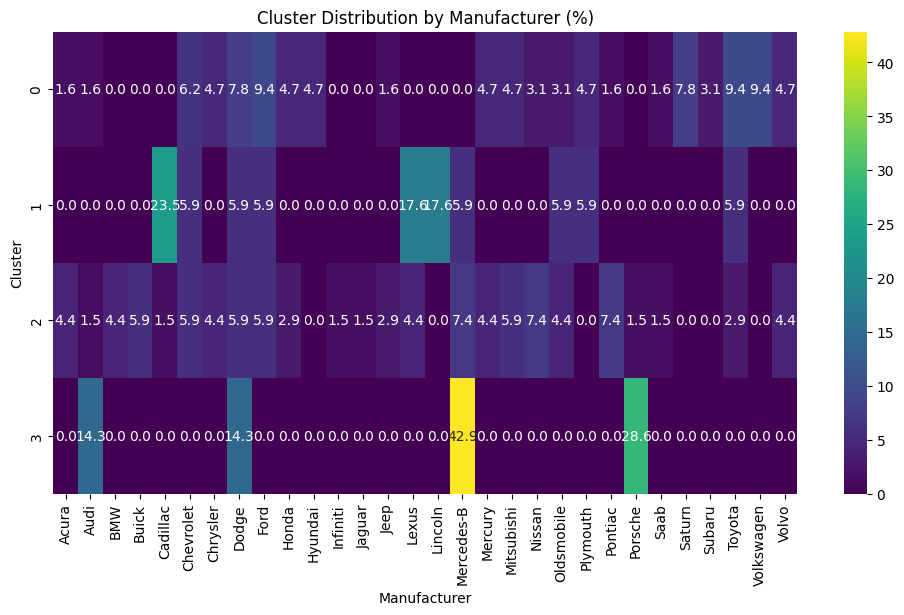

Percentage of each Vehicle_Type in each Cluster:
Vehicle_type        Car   Passenger
Cluster                            
0             17.187500   82.812500
1             35.294118   64.705882
2             33.823529   66.176471
3              0.000000  100.000000


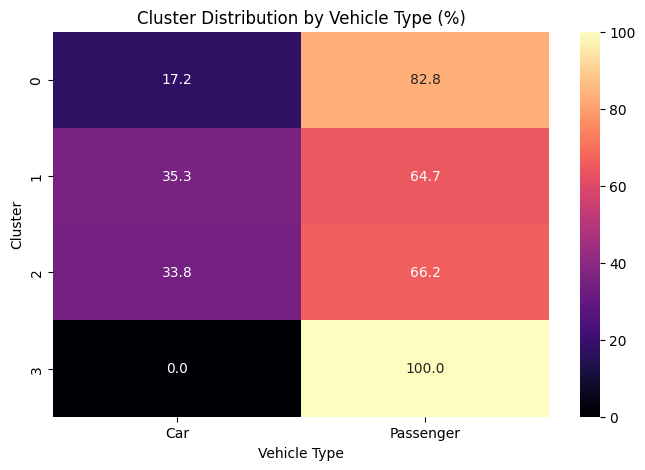

In [39]:
# Are clusters linked to specific Make, Vehicle_Type?


# Assume df already has a 'Cluster' column from previous clustering step
# Example: df['Cluster'] = kmeans.labels_

# -----------------------------
# 1. Check cluster distribution by Manufacturer
cluster_make = pd.crosstab(df['Cluster'], df['Manufacturer'], normalize='index') * 100  # percentage
print("Percentage of each Manufacturer in each Cluster:")
print(cluster_make)

# Optional: heatmap visualization
plt.figure(figsize=(12,6))
sns.heatmap(cluster_make, annot=True, fmt=".1f", cmap="viridis")
plt.title("Cluster Distribution by Manufacturer (%)")
plt.xlabel("Manufacturer")
plt.ylabel("Cluster")
plt.show()

# -----------------------------
# 2. Check cluster distribution by Vehicle_Type
cluster_type = pd.crosstab(df['Cluster'], df['Vehicle_type'], normalize='index') * 100  # percentage
print("Percentage of each Vehicle_Type in each Cluster:")
print(cluster_type)

# Heatmap visualization
plt.figure(figsize=(8,5))
sns.heatmap(cluster_type, annot=True, fmt=".1f", cmap="magma")
plt.title("Cluster Distribution by Vehicle Type (%)")
plt.xlabel("Vehicle Type")
plt.ylabel("Cluster")
plt.show()


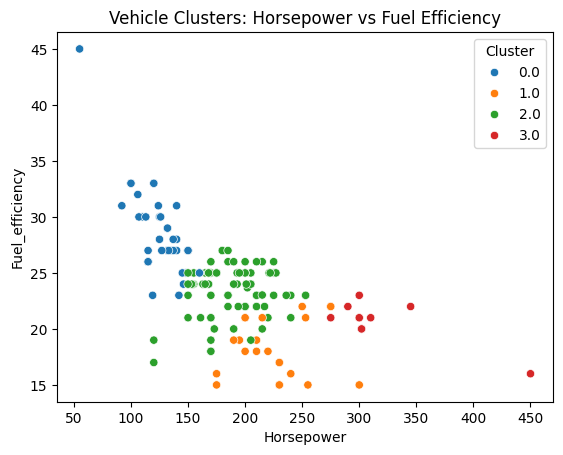

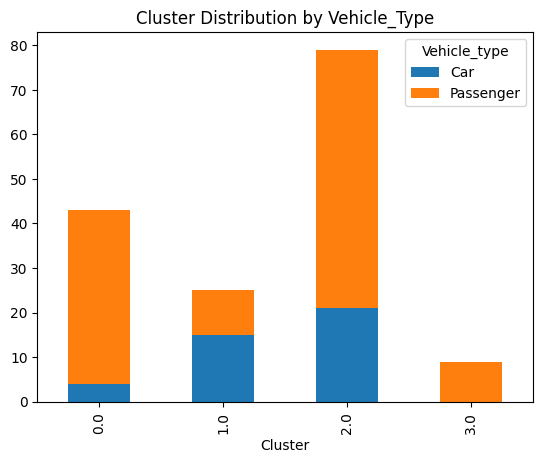

In [40]:
# KMeans clustering
features = ['Price_in_thousands','Horsepower','Engine_size','Fuel_efficiency']
X = df[features].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = np.nan
df.loc[X.index, 'Cluster'] = clusters

# Cluster scatterplot: Horsepower vs Fuel Efficiency
sns.scatterplot(x='Horsepower', y='Fuel_efficiency', hue='Cluster', palette='tab10', data=df)
plt.title("Vehicle Clusters: Horsepower vs Fuel Efficiency")
plt.show()

# Cluster distribution by Vehicle_Type
pd.crosstab(df['Cluster'], df['Vehicle_type']).plot(kind='bar', stacked=True)
plt.title("Cluster Distribution by Vehicle_Type")
plt.show()


/var/folders/6k/b0rqkgcn77g39rb5g8zn55zc0000gn/T/ipykernel_59470/1028324170.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_sales, x='Cluster', y='Sales_in_thousands', palette='viridis')


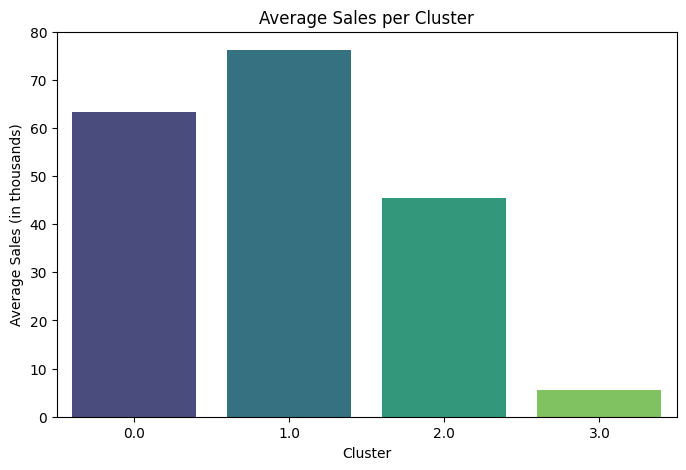

/var/folders/6k/b0rqkgcn77g39rb5g8zn55zc0000gn/T/ipykernel_59470/1028324170.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_resale, x='Cluster', y='Year_resale_value', palette='magma')


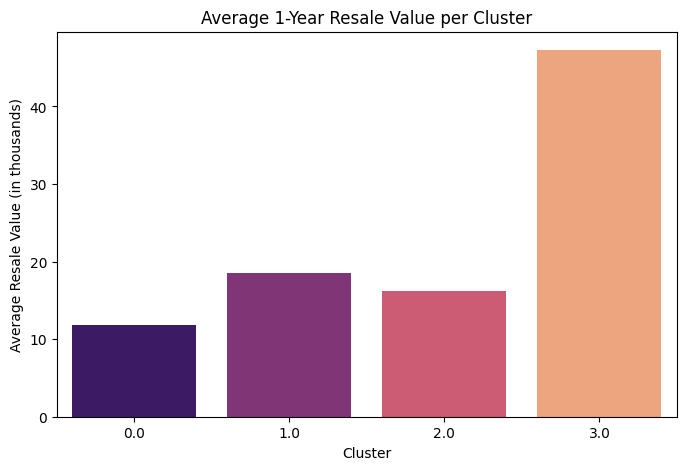

/var/folders/6k/b0rqkgcn77g39rb5g8zn55zc0000gn/T/ipykernel_59470/1028324170.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=design_avg, x='Cluster', y=feature, palette='coolwarm', ax=axes[i])
/var/folders/6k/b0rqkgcn77g39rb5g8zn55zc0000gn/T/ipykernel_59470/1028324170.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=design_avg, x='Cluster', y=feature, palette='coolwarm', ax=axes[i])
/var/folders/6k/b0rqkgcn77g39rb5g8zn55zc0000gn/T/ipykernel_59470/1028324170.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=design_av

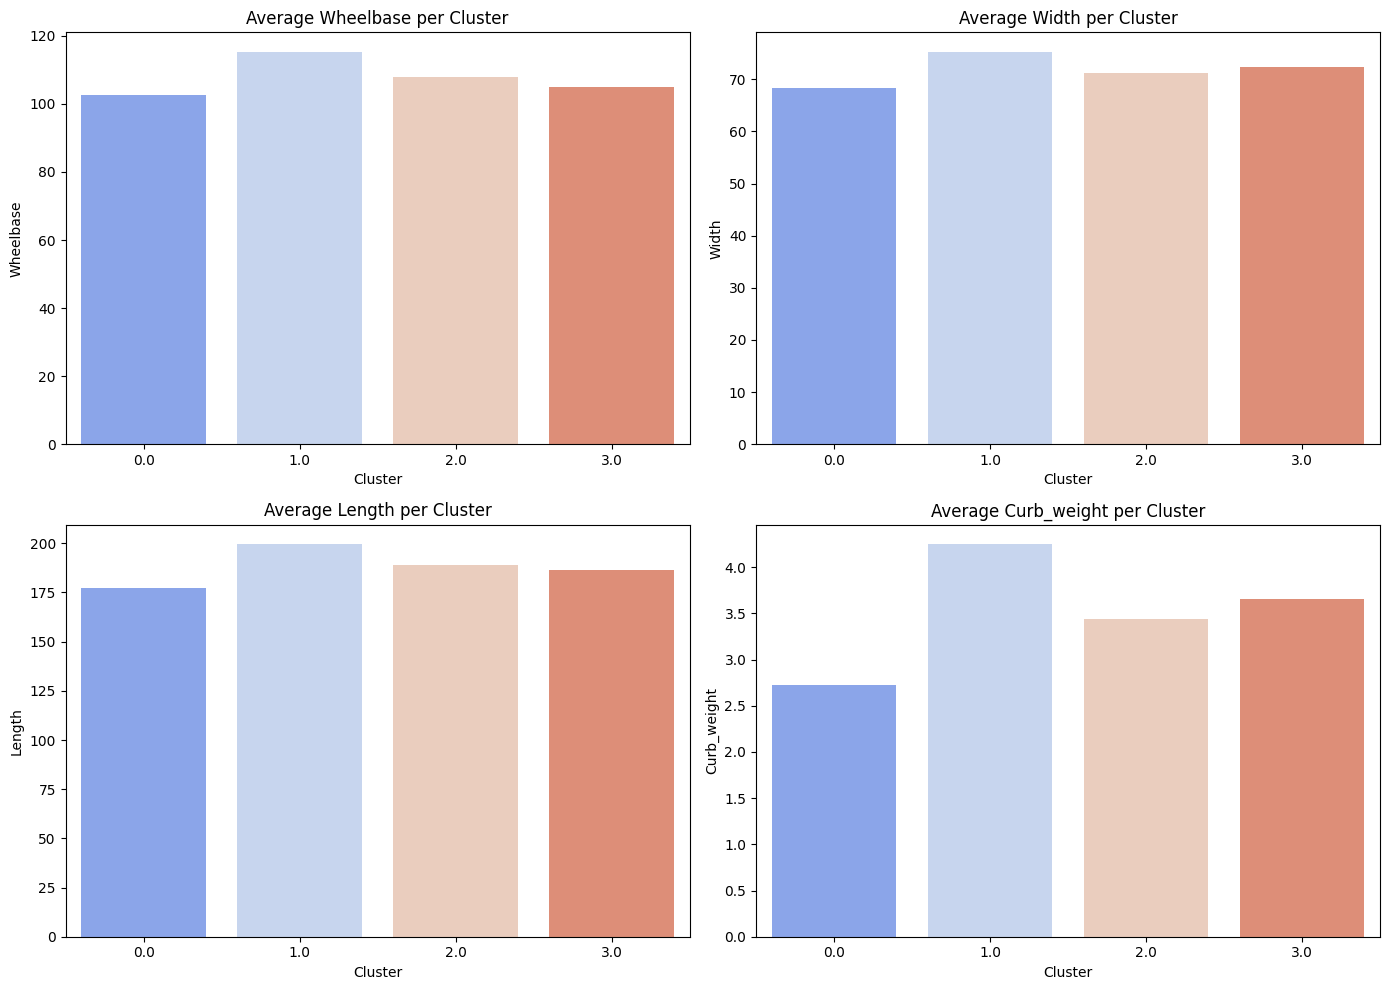

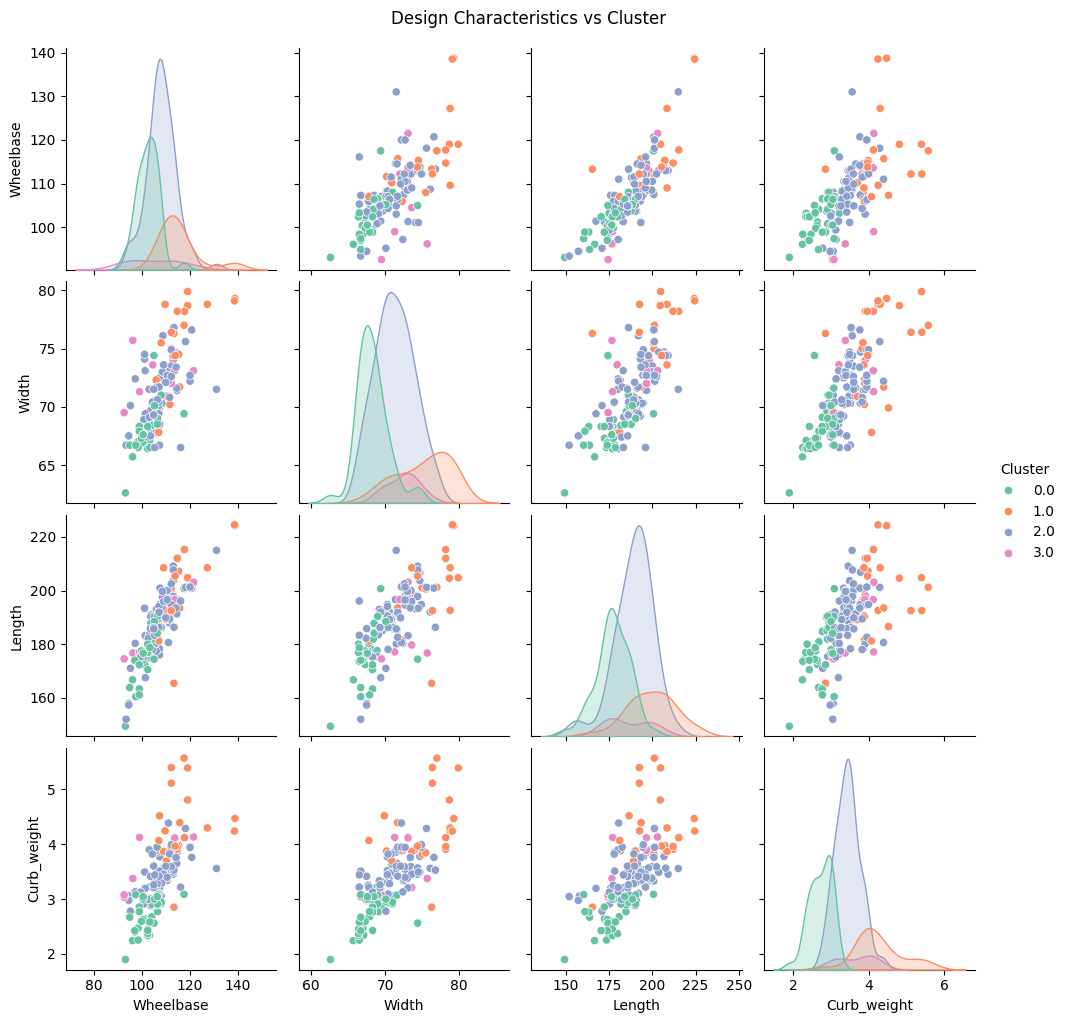

In [41]:
# Analyze clusters vs Sales, Resale Value, and design characteristics

# Assume df already has a 'Cluster' column from previous clustering step
# Example: df['Cluster'] = kmeans.labels_

# 1. Average Sales per Cluster
avg_sales = df.groupby('Cluster')['Sales_in_thousands'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=avg_sales, x='Cluster', y='Sales_in_thousands', palette='viridis')
plt.title("Average Sales per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Average Sales (in thousands)")
plt.show()

# 2. Average 1-Year Resale Value per Cluster
avg_resale = df.groupby('Cluster')['Year_resale_value'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=avg_resale, x='Cluster', y='Year_resale_value', palette='magma')
plt.title("Average 1-Year Resale Value per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Average Resale Value (in thousands)")
plt.show()

# 3. Design Characteristics per Cluster
# Features like Wheelbase, Width, Length, Curb_weight
design_features = ['Wheelbase', 'Width', 'Length', 'Curb_weight']
design_avg = df.groupby('Cluster')[design_features].mean().reset_index()

# Plot as multiple barplots
fig, axes = plt.subplots(2, 2, figsize=(14,10))
axes = axes.flatten()

for i, feature in enumerate(design_features):
    sns.barplot(data=design_avg, x='Cluster', y=feature, palette='coolwarm', ax=axes[i])
    axes[i].set_title(f"Average {feature} per Cluster")
    axes[i].set_xlabel("Cluster")
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

# 4. Optional: Pairplot to visualize cluster distribution over design features
sns.pairplot(df, vars=design_features, hue='Cluster', palette='Set2')
plt.suptitle("Design Characteristics vs Cluster", y=1.02)
plt.show()


In [42]:

# Calculate age relative to today
today = pd.Timestamp.today()
df['Age_days'] = (today - df['Latest_Launch']).dt.days
df['Age_years'] = df['Age_days'] // 365
df['Age_months'] = (df['Age_days'] % 365) // 30  # approximate months
df['Age_years_months'] = df['Age_years'].astype(str) + " yrs " + df['Age_months'].astype(str) + " mo"

# Check result
df[['Latest_Launch', 'Age_days', 'Age_years', 'Age_months', 'Age_years_months']].head()


Latest_Launch  Age_days  Age_years  Age_months Age_years_months
0    2012-02-02      4996         13           8      13 yrs 8 mo
1    2011-06-03      5240         14           4      14 yrs 4 mo
2    2012-01-04      5025         13           9      13 yrs 9 mo
3    2011-03-10      5325         14           7      14 yrs 7 mo
4    2011-10-08      5113         14           0      14 yrs 0 mo

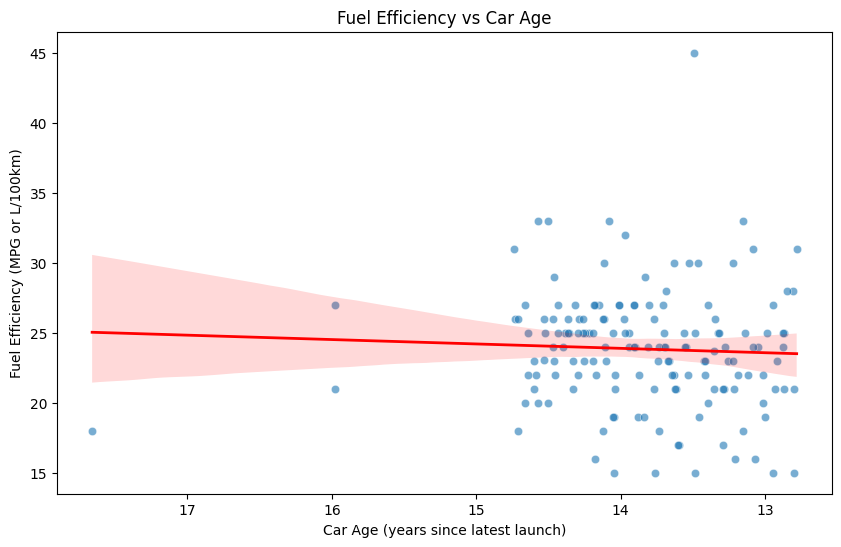

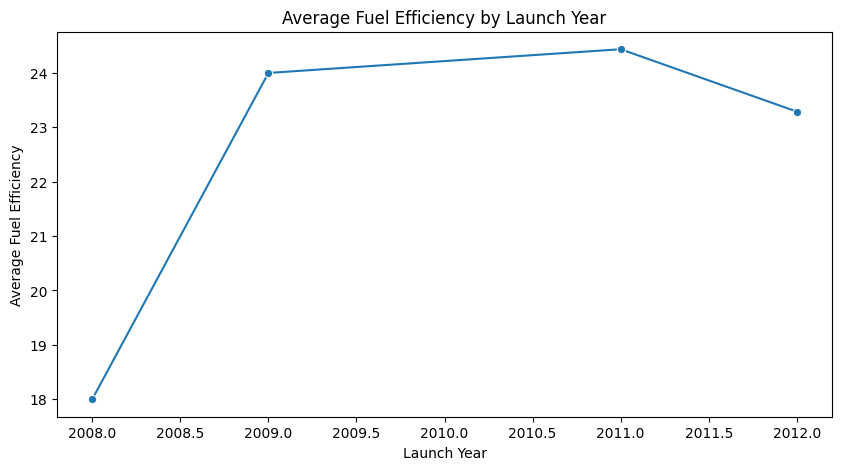

In [43]:
# Are newer cars more fuel-efficient?

# Ensure required columns exist
required_cols = ['Latest_Launch', 'Fuel_efficiency']  # Replace with actual column name
if all(col in df.columns for col in required_cols):

    # Convert Latest_Launch to datetime if not already
    df['Latest_Launch'] = pd.to_datetime(df['Latest_Launch'])

    # Calculate age in years relative to today
    today = pd.Timestamp.today()
    df['Age_years'] = (today - df['Latest_Launch']).dt.days / 365

    plt.figure(figsize=(10,6))
    
    # Scatter plot: Fuel Efficiency vs Age
    sns.scatterplot(
        data=df,
        x='Age_years',
        y='Fuel_efficiency',
        alpha=0.6
    )
    
    # Regression line to show trend
    sns.regplot(
        data=df,
        x='Age_years',
        y='Fuel_efficiency',
        scatter=False,
        color='red',
        line_kws={'linewidth':2}
    )
    
    plt.title("Fuel Efficiency vs Car Age")
    plt.xlabel("Car Age (years since latest launch)")
    plt.ylabel("Fuel Efficiency (MPG or L/100km)")
    plt.gca().invert_xaxis()  # Optional: show newer cars on left
    plt.show()
    
    # Optional: Average fuel efficiency by launch year
    df['Launch_Year'] = df['Latest_Launch'].dt.year
    avg_fuel = df.groupby('Launch_Year')['Fuel_efficiency'].mean()
    
    plt.figure(figsize=(10,5))
    sns.lineplot(x=avg_fuel.index, y=avg_fuel.values, marker='o')
    plt.title("Average Fuel Efficiency by Launch Year")
    plt.xlabel("Launch Year")
    plt.ylabel("Average Fuel Efficiency")
    plt.show()


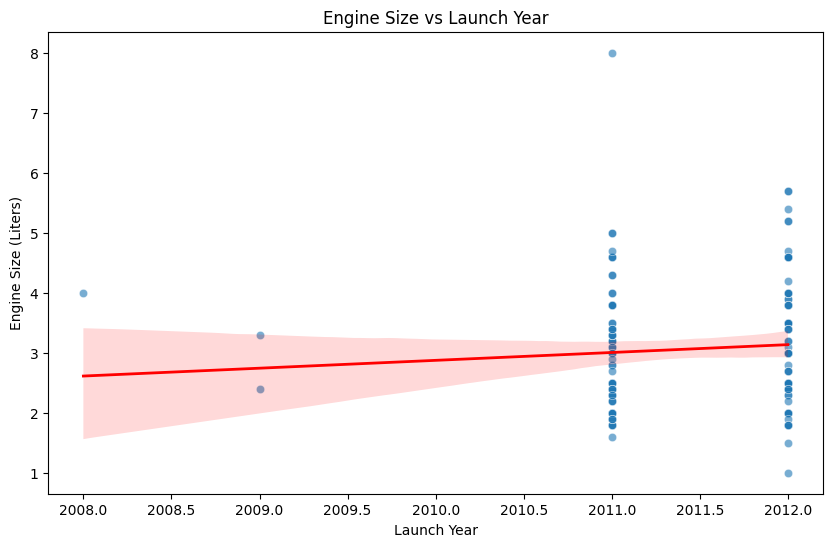

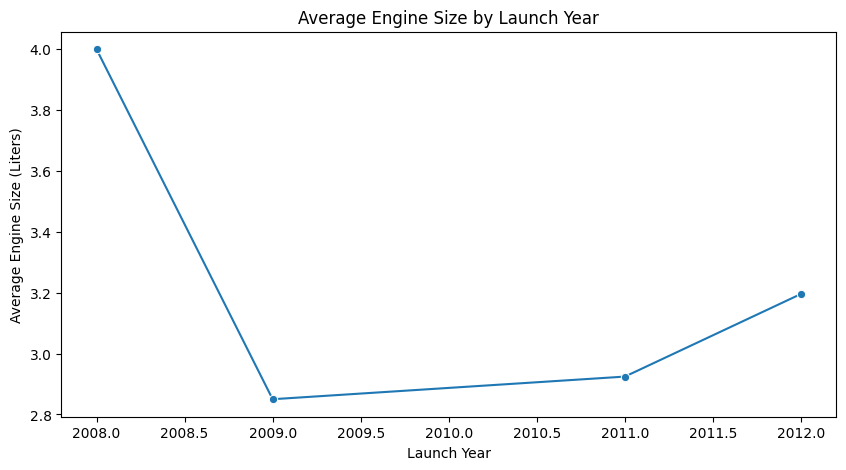

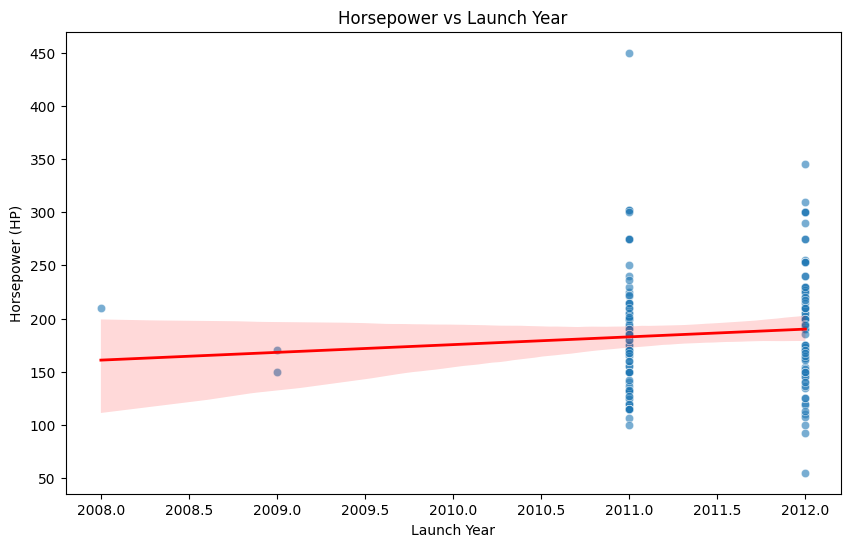

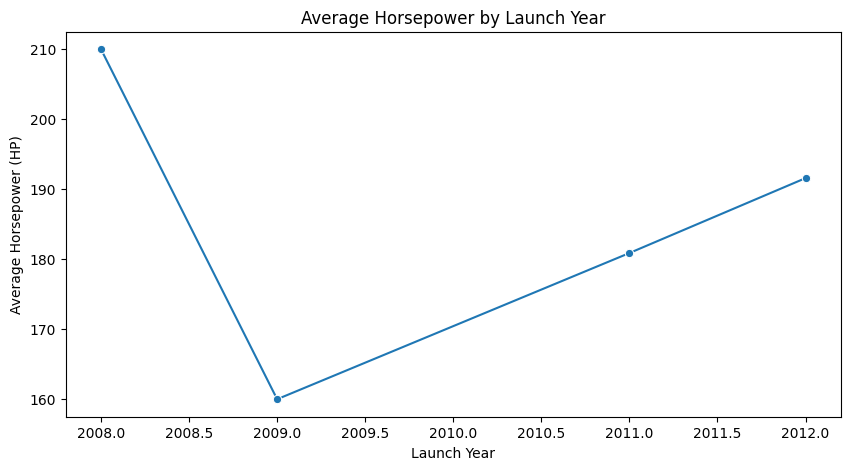

In [44]:
# Engine Size and Horsepower vs Year / Launch
# Are engine sizes or horsepower increasing over time?

required_cols = ['Latest_Launch', 'Engine_size', 'Horsepower']
if all(col in df.columns for col in required_cols):

    # Convert Latest_Launch to datetime if not already
    df['Latest_Launch'] = pd.to_datetime(df['Latest_Launch'])
    df['Launch_Year'] = df['Latest_Launch'].dt.year

    # 1. Engine Size over time
    plt.figure(figsize=(10,6))
    sns.scatterplot(data=df, x='Launch_Year', y='Engine_size', alpha=0.6)
    sns.regplot(data=df, x='Launch_Year', y='Engine_size', scatter=False, color='red', line_kws={'linewidth':2})
    plt.title("Engine Size vs Launch Year")
    plt.xlabel("Launch Year")
    plt.ylabel("Engine Size (Liters)")
    plt.show()

    # Optional: Average engine size by year
    avg_engine = df.groupby('Launch_Year')['Engine_size'].mean()
    plt.figure(figsize=(10,5))
    sns.lineplot(x=avg_engine.index, y=avg_engine.values, marker='o')
    plt.title("Average Engine Size by Launch Year")
    plt.xlabel("Launch Year")
    plt.ylabel("Average Engine Size (Liters)")
    plt.show()

    # 2. Horsepower over time
    plt.figure(figsize=(10,6))
    sns.scatterplot(data=df, x='Launch_Year', y='Horsepower', alpha=0.6)
    sns.regplot(data=df, x='Launch_Year', y='Horsepower', scatter=False, color='red', line_kws={'linewidth':2})
    plt.title("Horsepower vs Launch Year")
    plt.xlabel("Launch Year")
    plt.ylabel("Horsepower (HP)")
    plt.show()

    # Optional: Average horsepower by year
    avg_hp = df.groupby('Launch_Year')['Horsepower'].mean()
    plt.figure(figsize=(10,5))
    sns.lineplot(x=avg_hp.index, y=avg_hp.values, marker='o')
    plt.title("Average Horsepower by Launch Year")
    plt.xlabel("Launch Year")
    plt.ylabel("Average Horsepower (HP)")
    plt.show()


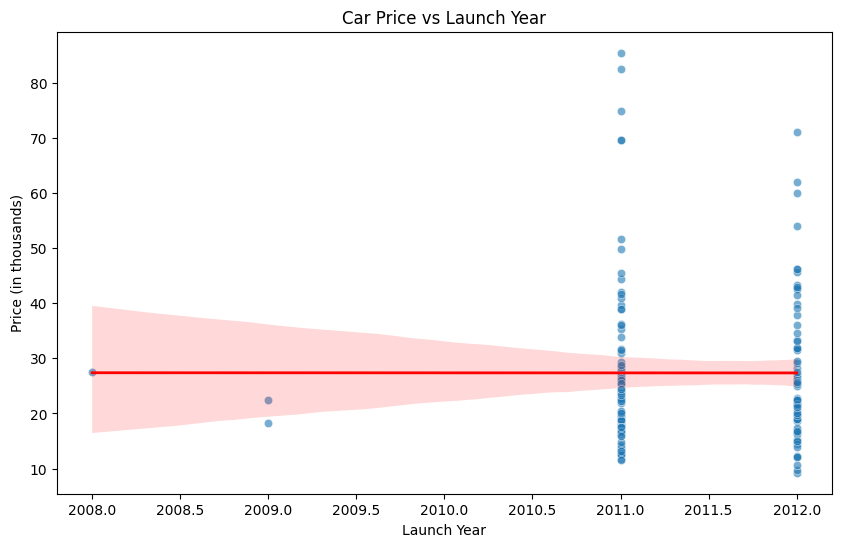

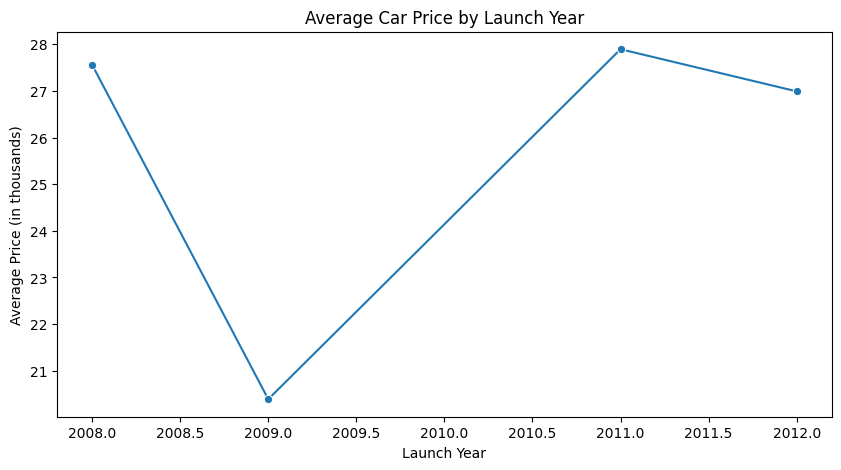

In [45]:
# Are newer cars more expensive?

required_cols = ['Latest_Launch', 'Price_in_thousands']
if all(col in df.columns for col in required_cols):

    # Convert Latest_Launch to datetime if not already
    df['Latest_Launch'] = pd.to_datetime(df['Latest_Launch'])
    df['Launch_Year'] = df['Latest_Launch'].dt.year

    # 1. Scatter plot of Price vs Launch Year
    plt.figure(figsize=(10,6))
    sns.scatterplot(
        data=df,
        x='Launch_Year',
        y='Price_in_thousands',
        alpha=0.6
    )
    
    # Regression line to show trend
    sns.regplot(
        data=df,
        x='Launch_Year',
        y='Price_in_thousands',
        scatter=False,
        color='red',
        line_kws={'linewidth':2}
    )
    
    plt.title("Car Price vs Launch Year")
    plt.xlabel("Launch Year")
    plt.ylabel("Price (in thousands)")
    plt.show()

    # 2. Optional: Average price by launch year
    avg_price = df.groupby('Launch_Year')['Price_in_thousands'].mean()
    plt.figure(figsize=(10,5))
    sns.lineplot(x=avg_price.index, y=avg_price.values, marker='o')
    plt.title("Average Car Price by Launch Year")
    plt.xlabel("Launch Year")
    plt.ylabel("Average Price (in thousands)")
    plt.show()


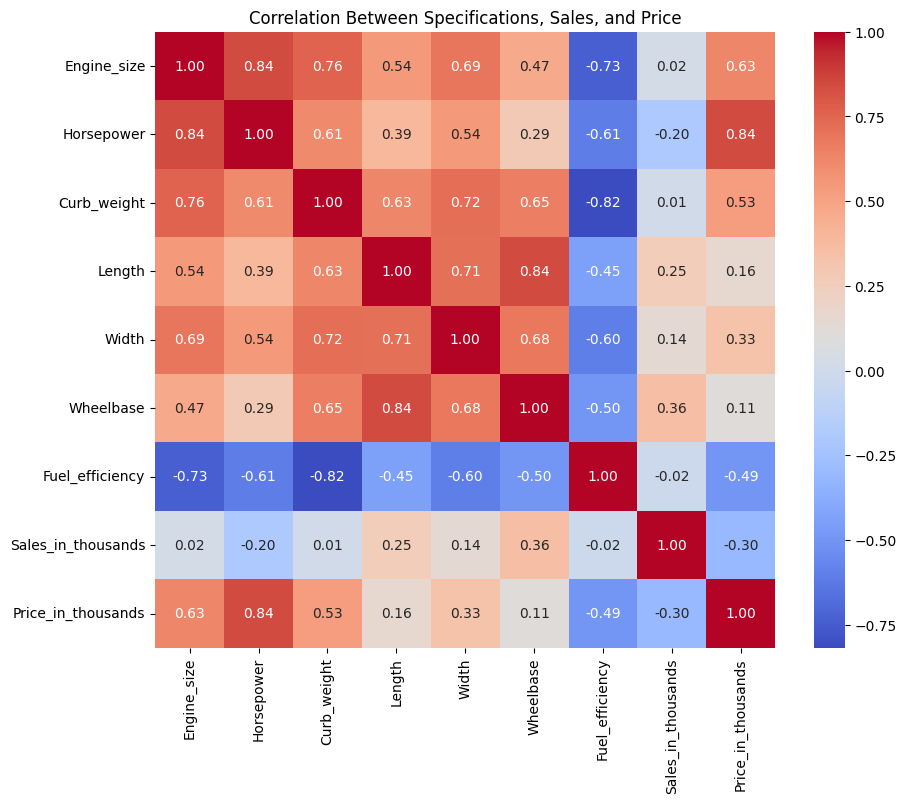

In [46]:
# How do specifications influence sales and price?
# Required columns
spec_cols = ['Engine_size', 'Horsepower', 'Curb_weight', 'Length', 'Width', 'Wheelbase', 'Fuel_efficiency', 'Sales_in_thousands', 'Price_in_thousands']
if all(col in df.columns for col in spec_cols):

    # Correlation matrix
    corr = df[spec_cols].corr()
    plt.figure(figsize=(10,8))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
    plt.title("Correlation Between Specifications, Sales, and Price")
    plt.show()

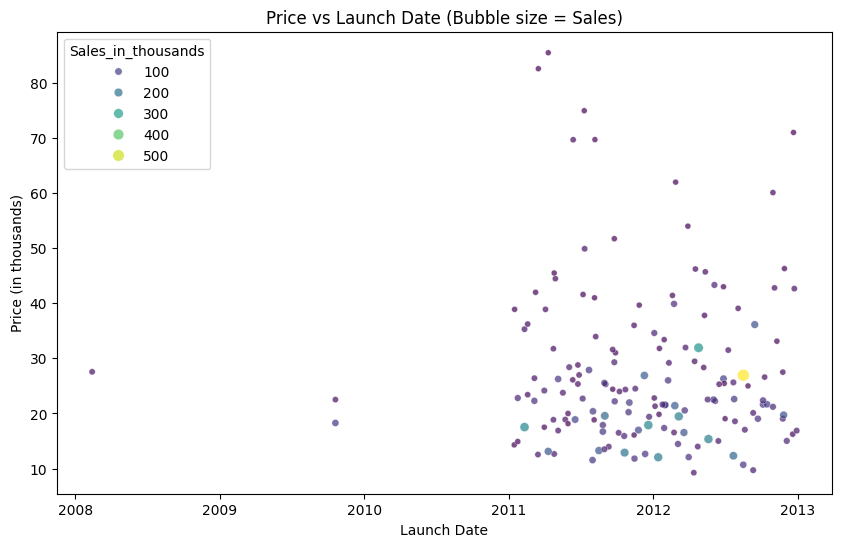

In [47]:
# How do sales and prices trend over time with new launches?

    # Scatter plot of individual models
plt.figure(figsize=(10,6))
sns.scatterplot(
        data=df,
        x='Latest_Launch',
        y='Price_in_thousands',
        size='Sales_in_thousands',
        hue='Sales_in_thousands',
        palette='viridis',
        alpha=0.7
    )
plt.title("Price vs Launch Date (Bubble size = Sales)")
plt.xlabel("Launch Date")
plt.ylabel("Price (in thousands)")
plt.show()


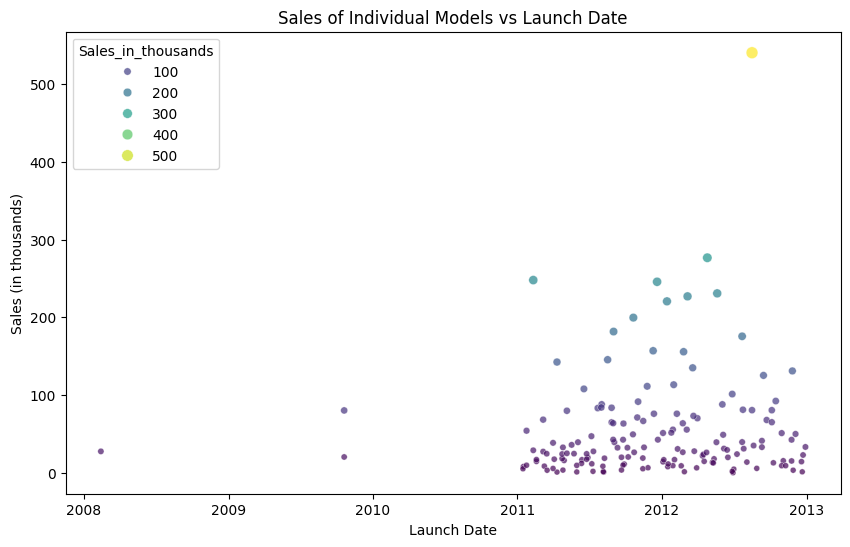

In [48]:
# Do recently launched models achieve higher sales?

    # 2. Scatter plot of individual models
plt.figure(figsize=(10,6))
sns.scatterplot(
        data=df,
        x='Latest_Launch',
        y='Sales_in_thousands',
        hue='Sales_in_thousands',
        size='Sales_in_thousands',
        palette='viridis',
        alpha=0.7
    )
plt.title("Sales of Individual Models vs Launch Date")
plt.xlabel("Launch Date")
plt.ylabel("Sales (in thousands)")
plt.show()


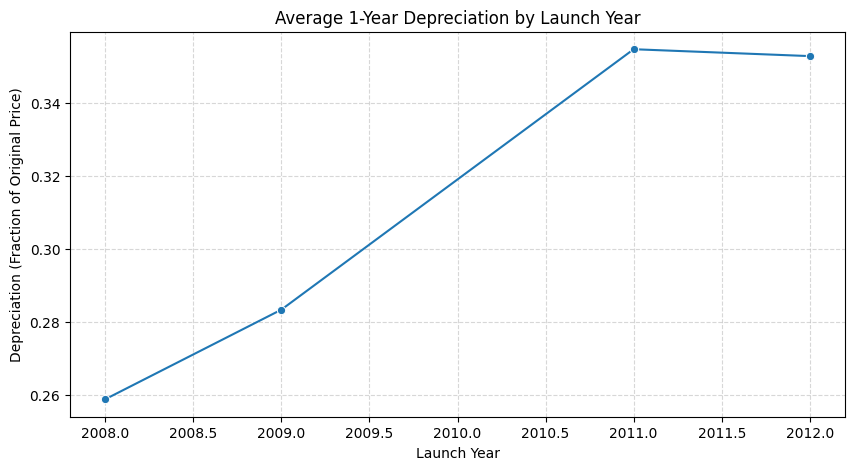

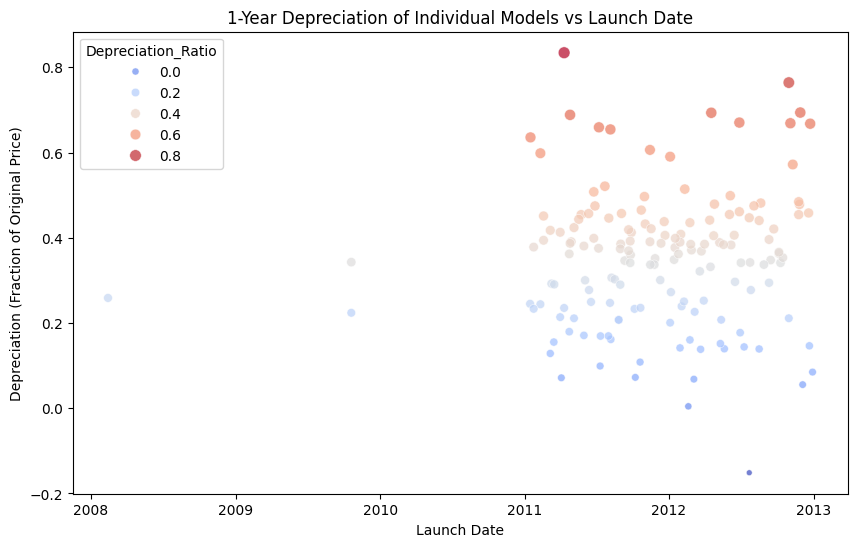

In [49]:
# How fast do cars depreciate after launch?
# Ensure necessary columns exist
required_cols = ['Latest_Launch', 'Price_in_thousands', 'Year_resale_value']
if all(col in df.columns for col in required_cols):

    # Convert Latest_Launch to datetime
    df['Latest_Launch'] = pd.to_datetime(df['Latest_Launch'], errors='coerce')

    # Calculate Depreciation Ratio = 1 - (Resale / Original Price)
    df['Depreciation_Ratio'] = 1 - (df['Year_resale_value'] / df['Price_in_thousands'])

    # Extract launch year
    df['Launch_Year'] = df['Latest_Launch'].dt.year

    # Average depreciation by launch year
    avg_depreciation = df.groupby('Launch_Year')['Depreciation_Ratio'].mean()

    # Plot average depreciation over launch years
    plt.figure(figsize=(10,5))
    sns.lineplot(x=avg_depreciation.index, y=avg_depreciation.values, marker='o')
    plt.title("Average 1-Year Depreciation by Launch Year")
    plt.xlabel("Launch Year")
    plt.ylabel("Depreciation (Fraction of Original Price)")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

    # Scatter plot for individual models
    plt.figure(figsize=(10,6))
    sns.scatterplot(
        data=df,
        x='Latest_Launch',
        y='Depreciation_Ratio',
        hue='Depreciation_Ratio',
        size='Depreciation_Ratio',
        palette='coolwarm',
        alpha=0.7
    )
    plt.title("1-Year Depreciation of Individual Models vs Launch Date")
    plt.xlabel("Launch Date")
    plt.ylabel("Depreciation (Fraction of Original Price)")
    plt.show()
